#Imports

In [ ]:
!pip install -q scikit-optimize
!pip install -q statsforecast
!pip install -q keras-tuner
!pip install -q scalecast
!pip install -q keras
!pip install bayesian-optimization

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.0/340.0 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.8/285.8 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 15.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.0 MB/s eta 0:00:00
   

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import json
import os
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from scalecast.Forecaster import Forecaster
from scalecast.util import Forecaster_with_missing_vals
import matplotlib.dates as mdates
from datetime import date
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# XGBoost
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor
from typing import Tuple
from pprint import pprint
from time import time
from sklearn.metrics import make_scorer
from functools import partial
from sklearn.model_selection import KFold, StratifiedKFold

# ARIMA
from statsmodels.tsa.arima.model import ARIMA
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA

# LSTM
from keras.models import Sequential
from keras.layers import LSTM, Dense
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.losses import MeanAbsolutePercentageError

import numpy as np
import pandas as pd
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error
)


import joblib
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# i = 0
# while(True):
#   i +=1

#Merging Data

In [ ]:
dfmain_all = pd.DataFrame()
crop_names_list = ['Cotton 31 mm' , 'Mustard' , 'Paddy_NON Basmati' , 'Rice raw common' , 'Soybean' , 'Wheat']
with pd.ExcelWriter('/content/drive/MyDrive/Commodity Prices Forecasting/Input/All_Crops_Prices.xlsx', engine='openpyxl') as writer:
  for crop in crop_names_list:
    dfmain = pd.read_excel('/content/drive/MyDrive/Commodity Prices Forecasting/Input/Historical Prices.xlsx', sheet_name=crop)
    df2 = pd.read_excel('/content/drive/MyDrive/Commodity Prices Forecasting/Input/prices.xlsx', sheet_name=crop)
    dfmain.rename(columns={'Price Date': 'Date' , 'Price (Rs/Quintal)': 'Price'}, inplace=True)
    dfmain = dfmain[['Price' , 'Date']]
    df2 = df2[['Price' , 'Date']]
    df_combined = pd.concat([dfmain, df2], ignore_index=True)
    print(dfmain.head(5))
    print(df2.head(5))
    print(df_combined.head(5))
    df_combined.to_excel(writer, sheet_name = crop, index=False)


/usr/local/lib/python3.11/dist-packages/openpyxl/packaging/custom.py:213: UserWarning: Unknown type for ContentTypeId
  warn(f"Unknown type for {prop.name}")
/usr/local/lib/python3.11/dist-packages/openpyxl/packaging/custom.py:213: UserWarning: Unknown type for _ip_UnifiedCompliancePolicyUIAction
  warn(f"Unknown type for {prop.name}")
/usr/local/lib/python3.11/dist-packages/openpyxl/packaging/custom.py:213: UserWarning: Unknown type for _ip_UnifiedCompliancePolicyProperties
  warn(f"Unknown type for {prop.name}")
/usr/local/lib/python3.11/dist-packages/openpyxl/packaging/custom.py:213: UserWarning: Unknown type for _activity
  warn(f"Unknown type for {prop.name}")
/usr/local/lib/python3.11/dist-packages/openpyxl/packaging/custom.py:213: UserWarning: Unknown type for MSIP_Label_e3ba8fb0-bbb8-454c-aa98-661329b3f27f_Enabled
  warn(f"Unknown type for {prop.name}")
/usr/local/lib/python3.11/dist-packages/openpyxl/packaging/custom.py:213: UserWarning: Unknown type for MSIP_Label_e3ba8fb0-bb

         Price                 Date
0  5332.724719                38642
1  5345.758427  2005-10-18 00:00:00
2  5369.522472  2005-10-19 00:00:00
3  5406.882022  2005-10-20 00:00:00
4  5409.943820  2005-10-21 00:00:00
   Price       Date
0  15466 2025-03-01
1  15607 2025-03-03
2  15466 2025-03-04
3  15466 2025-03-05
4  15466 2025-03-06
         Price                 Date
0  5332.724719                38642
1  5345.758427  2005-10-18 00:00:00
2  5369.522472  2005-10-19 00:00:00
3  5406.882022  2005-10-20 00:00:00
4  5409.943820  2005-10-21 00:00:00


/usr/local/lib/python3.11/dist-packages/openpyxl/packaging/custom.py:213: UserWarning: Unknown type for ContentTypeId
  warn(f"Unknown type for {prop.name}")
/usr/local/lib/python3.11/dist-packages/openpyxl/packaging/custom.py:213: UserWarning: Unknown type for _ip_UnifiedCompliancePolicyUIAction
  warn(f"Unknown type for {prop.name}")
/usr/local/lib/python3.11/dist-packages/openpyxl/packaging/custom.py:213: UserWarning: Unknown type for _ip_UnifiedCompliancePolicyProperties
  warn(f"Unknown type for {prop.name}")
/usr/local/lib/python3.11/dist-packages/openpyxl/packaging/custom.py:213: UserWarning: Unknown type for _activity
  warn(f"Unknown type for {prop.name}")
/usr/local/lib/python3.11/dist-packages/openpyxl/packaging/custom.py:213: UserWarning: Unknown type for MSIP_Label_e3ba8fb0-bbb8-454c-aa98-661329b3f27f_Enabled
  warn(f"Unknown type for {prop.name}")
/usr/local/lib/python3.11/dist-packages/openpyxl/packaging/custom.py:213: UserWarning: Unknown type for MSIP_Label_e3ba8fb0-bb

     Price                 Date
0  1932.50  2005-01-01 00:00:00
1  1928.50  2005-01-03 00:00:00
2  1889.75  2005-01-04 00:00:00
3  1880.75  2005-01-05 00:00:00
4  1876.75  2005-01-06 00:00:00
     Price       Date
0  6340.55 2025-03-01
1  6292.45 2025-03-03
2  6268.30 2025-03-04
3  6203.95 2025-03-05
4  6177.05 2025-03-06
     Price                 Date
0  1932.50  2005-01-01 00:00:00
1  1928.50  2005-01-03 00:00:00
2  1889.75  2005-01-04 00:00:00
3  1880.75  2005-01-05 00:00:00
4  1876.75  2005-01-06 00:00:00


/usr/local/lib/python3.11/dist-packages/openpyxl/packaging/custom.py:213: UserWarning: Unknown type for ContentTypeId
  warn(f"Unknown type for {prop.name}")
/usr/local/lib/python3.11/dist-packages/openpyxl/packaging/custom.py:213: UserWarning: Unknown type for _ip_UnifiedCompliancePolicyUIAction
  warn(f"Unknown type for {prop.name}")
/usr/local/lib/python3.11/dist-packages/openpyxl/packaging/custom.py:213: UserWarning: Unknown type for _ip_UnifiedCompliancePolicyProperties
  warn(f"Unknown type for {prop.name}")
/usr/local/lib/python3.11/dist-packages/openpyxl/packaging/custom.py:213: UserWarning: Unknown type for _activity
  warn(f"Unknown type for {prop.name}")
/usr/local/lib/python3.11/dist-packages/openpyxl/packaging/custom.py:213: UserWarning: Unknown type for MSIP_Label_e3ba8fb0-bbb8-454c-aa98-661329b3f27f_Enabled
  warn(f"Unknown type for {prop.name}")
/usr/local/lib/python3.11/dist-packages/openpyxl/packaging/custom.py:213: UserWarning: Unknown type for MSIP_Label_e3ba8fb0-bb

   Price                 Date
0    800  2006-07-01 00:00:00
1    815  2006-08-01 00:00:00
2    825  2006-09-01 00:00:00
3    850  2006-10-01 00:00:00
4    850  2006-11-01 00:00:00
   Price       Date
0   2200 2025-03-01
1   2500 2025-03-13
2   2300 2025-03-14
3   2500 2025-03-15
4   2500 2025-03-18
   Price                 Date
0    800  2006-07-01 00:00:00
1    815  2006-08-01 00:00:00
2    825  2006-09-01 00:00:00
3    850  2006-10-01 00:00:00
4    850  2006-11-01 00:00:00


/usr/local/lib/python3.11/dist-packages/openpyxl/packaging/custom.py:213: UserWarning: Unknown type for ContentTypeId
  warn(f"Unknown type for {prop.name}")
/usr/local/lib/python3.11/dist-packages/openpyxl/packaging/custom.py:213: UserWarning: Unknown type for _ip_UnifiedCompliancePolicyUIAction
  warn(f"Unknown type for {prop.name}")
/usr/local/lib/python3.11/dist-packages/openpyxl/packaging/custom.py:213: UserWarning: Unknown type for _ip_UnifiedCompliancePolicyProperties
  warn(f"Unknown type for {prop.name}")
/usr/local/lib/python3.11/dist-packages/openpyxl/packaging/custom.py:213: UserWarning: Unknown type for _activity
  warn(f"Unknown type for {prop.name}")
/usr/local/lib/python3.11/dist-packages/openpyxl/packaging/custom.py:213: UserWarning: Unknown type for MSIP_Label_e3ba8fb0-bbb8-454c-aa98-661329b3f27f_Enabled
  warn(f"Unknown type for {prop.name}")
/usr/local/lib/python3.11/dist-packages/openpyxl/packaging/custom.py:213: UserWarning: Unknown type for MSIP_Label_e3ba8fb0-bb

   Price                 Date
0  950.0  2006-07-01 00:00:00
1  960.0  2006-08-01 00:00:00
2  975.0  2006-09-01 00:00:00
3  975.0  2006-10-01 00:00:00
4  975.0  2006-11-01 00:00:00
   Price       Date
0   4650 2025-03-01
1   4650 2025-03-03
2   4650 2025-03-04
3   4650 2025-03-05
4   4650 2025-03-13
   Price                 Date
0  950.0  2006-07-01 00:00:00
1  960.0  2006-08-01 00:00:00
2  975.0  2006-09-01 00:00:00
3  975.0  2006-10-01 00:00:00
4  975.0  2006-11-01 00:00:00


/usr/local/lib/python3.11/dist-packages/openpyxl/packaging/custom.py:213: UserWarning: Unknown type for ContentTypeId
  warn(f"Unknown type for {prop.name}")
/usr/local/lib/python3.11/dist-packages/openpyxl/packaging/custom.py:213: UserWarning: Unknown type for _ip_UnifiedCompliancePolicyUIAction
  warn(f"Unknown type for {prop.name}")
/usr/local/lib/python3.11/dist-packages/openpyxl/packaging/custom.py:213: UserWarning: Unknown type for _ip_UnifiedCompliancePolicyProperties
  warn(f"Unknown type for {prop.name}")
/usr/local/lib/python3.11/dist-packages/openpyxl/packaging/custom.py:213: UserWarning: Unknown type for _activity
  warn(f"Unknown type for {prop.name}")
/usr/local/lib/python3.11/dist-packages/openpyxl/packaging/custom.py:213: UserWarning: Unknown type for MSIP_Label_e3ba8fb0-bbb8-454c-aa98-661329b3f27f_Enabled
  warn(f"Unknown type for {prop.name}")
/usr/local/lib/python3.11/dist-packages/openpyxl/packaging/custom.py:213: UserWarning: Unknown type for MSIP_Label_e3ba8fb0-bb

     Price                 Date
0  1291.50  2005-01-01 00:00:00
1  1290.85  2005-01-03 00:00:00
2  1276.00  2005-01-04 00:00:00
3  1266.75  2005-01-05 00:00:00
4  1267.75  2005-01-06 00:00:00
     Price       Date
0  4439.25 2025-03-01
1  4442.40 2025-03-03
2  4423.45 2025-03-04
3  4398.20 2025-03-05
4  4419.80 2025-03-06
     Price                 Date
0  1291.50  2005-01-01 00:00:00
1  1290.85  2005-01-03 00:00:00
2  1276.00  2005-01-04 00:00:00
3  1266.75  2005-01-05 00:00:00
4  1267.75  2005-01-06 00:00:00


/usr/local/lib/python3.11/dist-packages/openpyxl/packaging/custom.py:213: UserWarning: Unknown type for ContentTypeId
  warn(f"Unknown type for {prop.name}")
/usr/local/lib/python3.11/dist-packages/openpyxl/packaging/custom.py:213: UserWarning: Unknown type for _ip_UnifiedCompliancePolicyUIAction
  warn(f"Unknown type for {prop.name}")
/usr/local/lib/python3.11/dist-packages/openpyxl/packaging/custom.py:213: UserWarning: Unknown type for _ip_UnifiedCompliancePolicyProperties
  warn(f"Unknown type for {prop.name}")
/usr/local/lib/python3.11/dist-packages/openpyxl/packaging/custom.py:213: UserWarning: Unknown type for _activity
  warn(f"Unknown type for {prop.name}")
/usr/local/lib/python3.11/dist-packages/openpyxl/packaging/custom.py:213: UserWarning: Unknown type for MSIP_Label_e3ba8fb0-bbb8-454c-aa98-661329b3f27f_Enabled
  warn(f"Unknown type for {prop.name}")
/usr/local/lib/python3.11/dist-packages/openpyxl/packaging/custom.py:213: UserWarning: Unknown type for MSIP_Label_e3ba8fb0-bb

    Price                 Date
0  751.60  2005-06-13 00:00:00
1  752.35  2005-06-14 00:00:00
2  756.80  2005-06-15 00:00:00
3  763.10  2005-06-16 00:00:00
4  771.90  2005-06-17 00:00:00
    Price       Date
0  3150.0 2025-03-01
1  3168.6 2025-03-03
2  3240.0 2025-03-04
3  3303.3 2025-03-05
4  3250.0 2025-03-06
    Price                 Date
0  751.60  2005-06-13 00:00:00
1  752.35  2005-06-14 00:00:00
2  756.80  2005-06-15 00:00:00
3  763.10  2005-06-16 00:00:00
4  771.90  2005-06-17 00:00:00


# Preprocessing

In [ ]:
crop_names_list = ['Cotton 31 mm' , 'Mustard' , 'Paddy_NON Basmati' , 'Rice raw common' , 'Soybean' , 'Wheat']
current_crop = 'Mustard'

In [ ]:
root_path = '/content/drive/MyDrive/Commodity Prices Forecasting/'

In [ ]:
file_path = root_path + "Input/"  "All_Crops_Prices.xlsx"
prices = pd.read_excel(file_path , sheet_name = current_crop, header= 0)
# prices = prices[['Price Date', 'Price (Rs/Quintal)']]
prices['Date'] = pd.to_datetime(prices['Date'])
# prices.rename(columns={'Price Date': 'Date' , 'Price (Rs/Quintal)': 'Price'}, inplace=True)
prices = prices[prices['Date'] > '2000-01-01']
prices= prices.loc[~prices.index.duplicated(keep='first')].reset_index(drop = True)
prices = prices.drop_duplicates(subset='Date', keep='first')
prices = prices.sort_values('Date')  # Sort by Date first
prices_full = prices.copy()
prices = prices[prices['Date']>'2021-12-31']
prices



,Price,Date
4906,7433.05,2022-01-03
4907,7500.00,2022-01-04
4908,7559.00,2022-01-05
4909,7584.20,2022-01-06
4910,7688.75,2022-01-07
...,...,...
5662,6783.70,2025-06-19
5663,6793.70,2025-06-20
5664,6884.00,2025-06-23
5665,6803.45,2025-06-24


In [ ]:
prices_full

,Price,Date
0,1932.50,2005-01-01
1,1928.50,2005-01-03
2,1889.75,2005-01-04
3,1880.75,2005-01-05
4,1876.75,2005-01-06
...,...,...
5662,6783.70,2025-06-19
5663,6793.70,2025-06-20
5664,6884.00,2025-06-23
5665,6803.45,2025-06-24


In [110]:
current_datetime = datetime.now()
current_date = date.today()
excel_path = f"{root_path}/Output/{current_crop}_{current_datetime}.xlsx"
# excel_path = f"{root_path}/Output/Future_predictions.xlsx"
if os.path.exists(excel_path):
  mode_val = 'a'
else:
  mode_val = 'w'

with pd.ExcelWriter(excel_path  , engine = 'openpyxl' , mode = mode_val) as writer:
    prices.to_excel(writer , sheet_name = 'Actual')

# prices_full.to_excel(writer , sheet_name = 'Parameters')

# Additional Functions

In [ ]:
def smape(true, pred):
    return 100 * np.mean(2 * np.abs(true - pred) / (np.abs(true) + np.abs(pred) + 1e-8))

def calc_errors(true, pred):
    true = np.array(true)
    pred = np.array(pred)

    mse = mean_squared_error(true, pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(true, pred)
    mape = mean_absolute_percentage_error(true, pred) * 100
    smape_val = smape(true, pred)

    error_df = pd.DataFrame({
        'MSE': [mse],
        'RMSE': [rmse],
        'MAE': [mae],
        'MAPE (%)': [mape],
        'SMAPE (%)': [smape_val]
    })

    print("\n Error Metrics are:")
    return error_df.round(2)


def split_data(df):
    test_start = df[df.index >= pd.Timestamp('2025-04-01')].index.min()

    df_train = df[df.index < test_start]
    df_test = df[df.index >= test_start]

    total_rows = len(df_test)
    base, extra = divmod(total_rows, 2)
    targets = [base + (1 if i < extra else 0) for i in range(2)]

    splits = []
    start = 0
    for t in targets:
        end = start + t
        splits.append(df_test.iloc[start:end])
        start = end

    return df_train, *splits

def split_data_4_OOTs(df):
    test_start = df[df.index >= pd.Timestamp('2024-09-01')].index.min()

    df_train = df[df.index < test_start]
    df_test = df[df.index >= test_start]

    total_rows = len(df_test)
    base, extra = divmod(total_rows, 4)
    targets = [base + (1 if i < extra else 0) for i in range(4)]

    splits = []
    start = 0
    for t in targets:
        end = start + t
        splits.append(df_test.iloc[start:end])
        start = end

    return df_train, *splits


def plot_predictions(indices_list, y_true_list, y_preds_list, labels_list, titles, **kwargs):
    """
    Plot predictions for multiple models or t
ime windows.

    Parameters:
        indices_list : list of pd.DatetimeIndex
        y_true_list  : list of arrays (ground truth values)
        y_preds_list : list of lists (each inner list has predictions from different models)
        labels_list  : list of lists (each inner list has labels: [‘Actual’, 'Model1', 'Model2', ...])
        titles       : list of strings (one per plot)
        **kwargs     : Optional plooting kwargs (like figsize)
    """
    figsize = kwargs.get('figsize', (14, 5))

    for idx, y_true, preds, labels, title in zip(indices_list, y_true_list, y_preds_list, labels_list, titles):
        plt.figure(figsize=figsize)
        plt.plot(idx, y_true, label=labels[0], linewidth=2)  # Actual

        for pred, label in zip(preds, labels[1:]):
            plt.plot(idx, pred, label=label, linestyle='--')

        plt.title(title)
        plt.xlabel("Date")
        plt.ylabel("Price")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()



# EDA

In [ ]:
df = prices.copy()
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
train_df, oot1_df , oot2_df = split_data(df)


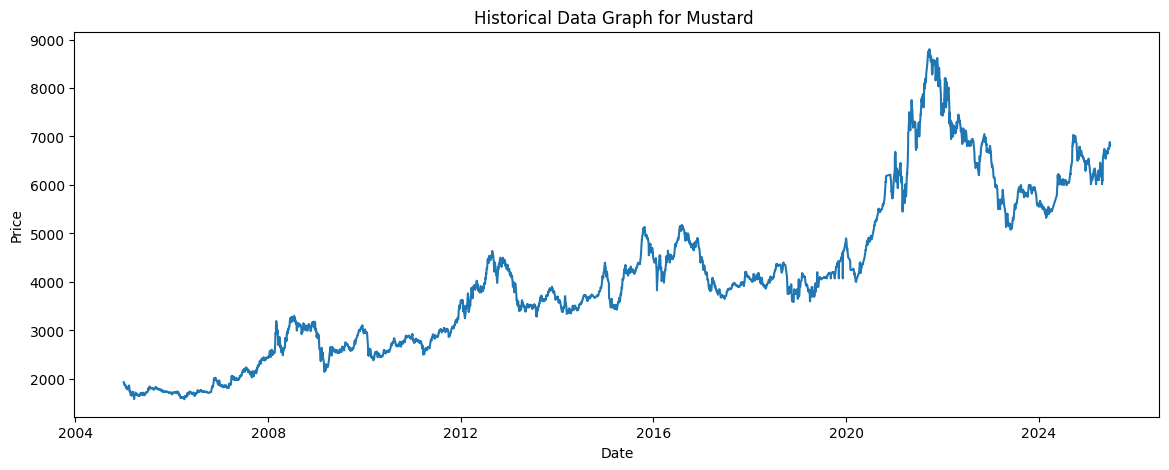

In [ ]:
plt.figure(figsize=(14, 5))
plt.plot(prices_full['Date'] , prices_full['Price'])
plt.title(f'Historical Data Graph for {current_crop} ')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


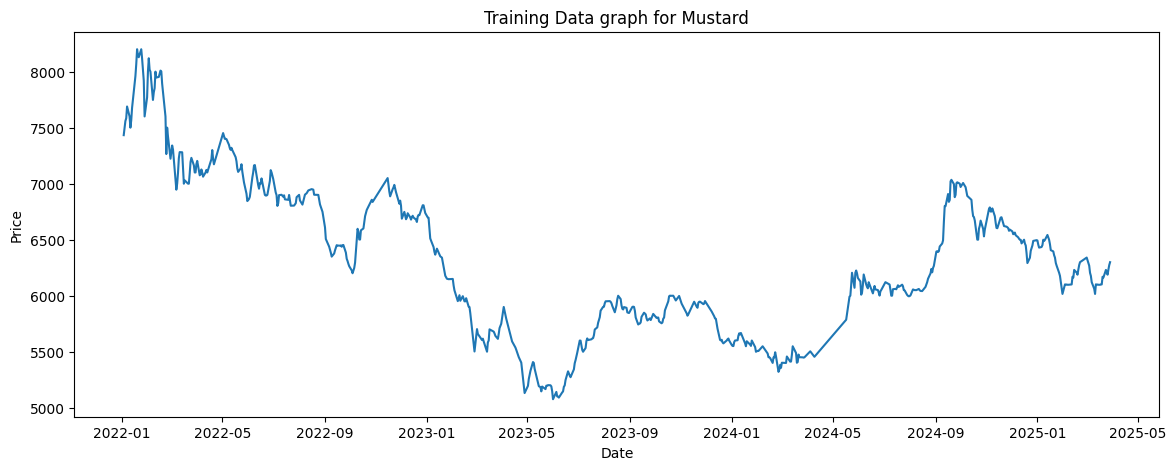

In [ ]:
plt.figure(figsize=(14, 5))
plt.plot(train_df)
plt.title(f'Training Data graph for {current_crop}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

35


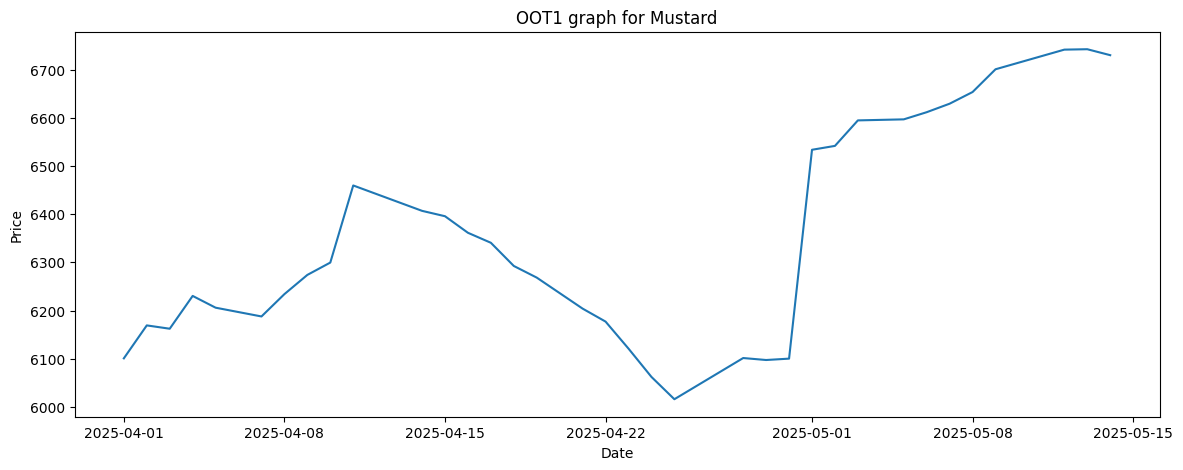

In [ ]:
plt.figure(figsize=(14, 5))
plt.plot(oot1_df)
print(len(oot1_df))
plt.title(f'OOT1 graph for {current_crop}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

34


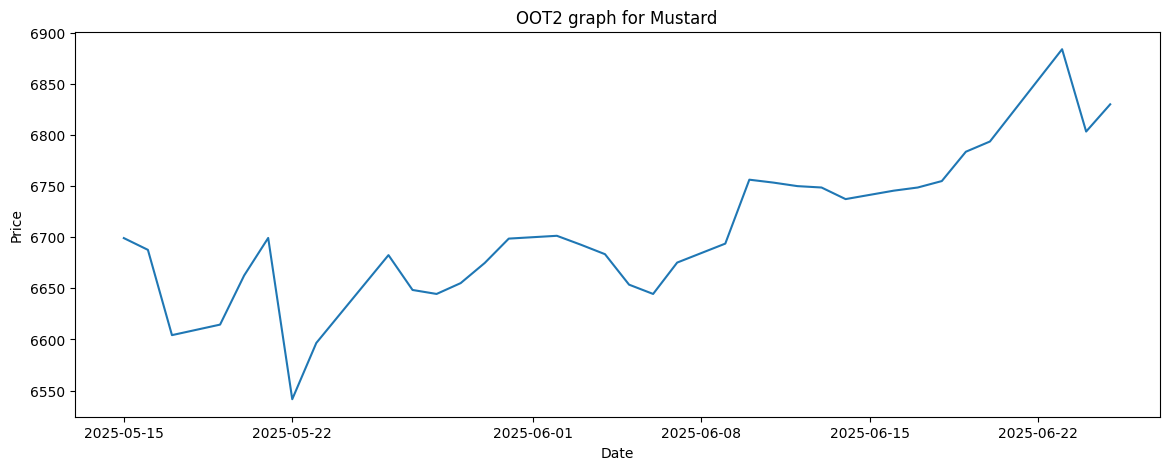

In [ ]:
plt.figure(figsize=(14, 5))
plt.plot(oot2_df)
print(len(oot2_df))
plt.title(f'OOT2 graph for {current_crop}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

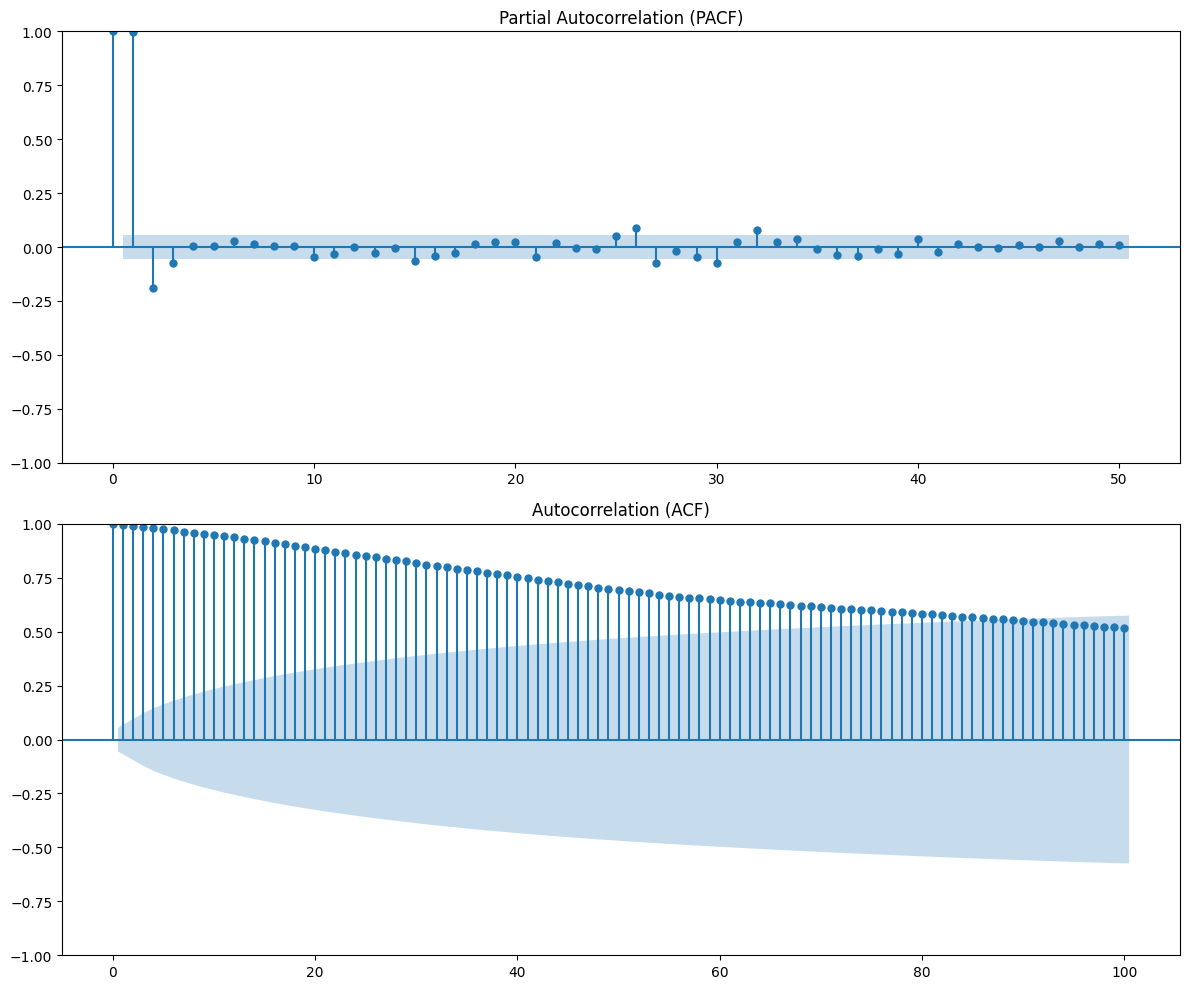

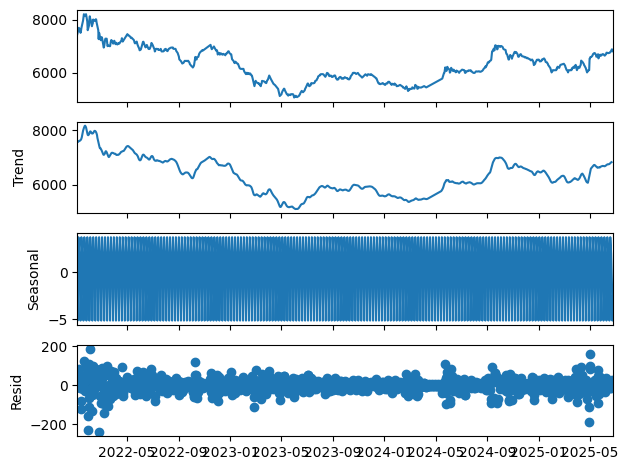

In [ ]:
f_temp = Forecaster_with_missing_vals(
    y= df['Price'],
    current_dates=df.index,
    desired_frequency='D',
    fill_strategy='linear_interp'
)
f = Forecaster(
    y=f_temp.y,
    current_dates=f_temp.current_dates,
    freq='D'
)

plt.figure(figsize=(12, 10))

# PACF plot
plt.subplot(2, 1, 1)
f.plot_pacf(lags=50, ax=plt.gca())
plt.title('Partial Autocorrelation (PACF)')

# ACF plot
plt.subplot(2, 1, 2)
f.plot_acf(lags=100, ax=plt.gca())
plt.title('Autocorrelation (ACF)')

plt.tight_layout()
plt.show()

# Seasonal Decomposition plot (separate full plot)
f.seasonal_decompose().plot()
plt.show()


In [ ]:
stat, pval, _, _, _, _ = f.adf_test(full_res=True)
print(f"ADF Statistic: {stat}")
print(f"p-value: {pval}")

ADF Statistic: -2.8700171496592657
p-value: 0.04894733920813513


In [ ]:
prices_22= prices_full[(prices_full['Date'] > '2022-01-01') & (prices_full['Date'] < '2022-12-31')]
prices_23 = prices_full[(prices_full['Date'] > '2023-01-01') & (prices_full['Date'] < '2023-12-31')]
prices_24 = prices_full[(prices_full['Date'] > '2024-01-01') & (prices_full['Date'] < '2024-12-31')]
prices_25 = prices_full[(prices_full['Date'] > '2025-01-01') & (prices_full['Date'] < '2025-12-31')]

for df in [prices_22, prices_23, prices_24, prices_25]:
    # Function to safely replace the year, handling Feb 29th
    def safe_replace_year(date, new_year):
        try:
            return date.replace(year=new_year)
        except ValueError:
            # If day is out of range (e.g., Feb 29 in a non-leap year)
            # set it to the last day of that month in the new year
            return date.replace(year=new_year, day=28) # Assuming Feb 29 is the only issue

    df.loc[:, 'Date'] = df['Date'].apply(lambda d: safe_replace_year(d, 2026))

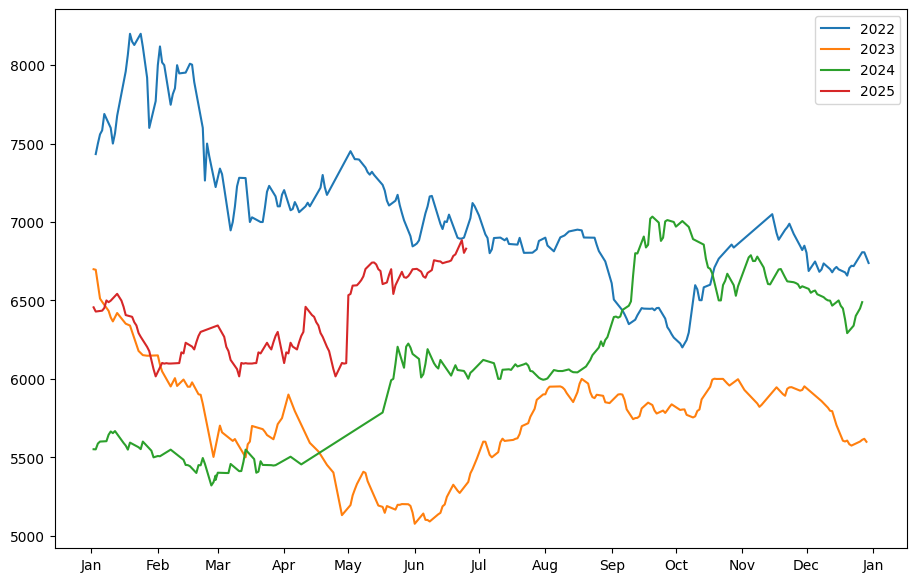

In [ ]:
plt.figure(figsize = (11, 7))
plt.plot(prices_22['Date'] , prices_22['Price'] , label = '2022')
plt.plot(prices_23['Date'] ,prices_23['Price'] , label = '2023')
plt.plot(prices_24['Date'] , prices_24['Price'] , label = '2024')
plt.plot(prices_25['Date'] ,prices_25['Price'] , label = '2025')
plt.legend()

ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # '%b' shows Jan, Feb, Mar...
ax.xaxis.set_major_locator(mdates.MonthLocator())  # Tick every month
plt.show()

#LSTM model N days

---



In [ ]:

! # --- SEQUENCE CREATION ---
def create_multi_feature_sequences_ndays(data):
  X = []
  Y = []

  for i in range(n_lookback, len(data) - n_forecast + 1):
      X.append(data[i - n_lookback: i , 0])
      Y.append(data[i: i + n_forecast , 0])

  # X = np.array(X)
  # Y = np.array(Y)
  return np.array(X) , np.array(Y)

def build_model_ndays(hp):
    model = Sequential()
    for i in range(hp.Int('num_layers', 1, 3)):
        # Tune number of units per layer: 32 to 128
        units = hp.Int(f'units_{i}', min_value=32, max_value=128, step=32)
        if i == 0:
            model.add(LSTM(units, return_sequences=(i < hp.get('num_layers') - 1), input_shape=(seq_len, 1)))
        else:
            model.add(LSTM(units, return_sequences=(i < hp.get('num_layers') - 1)))
        dropout_rate = hp.Float(f'dropout_{i}', 0.0, 0.5, step=0.1)
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))

    model.add(Dense(n_forecast))
    learning_rate = hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss=MeanAbsolutePercentageError())
    return model

def run_tunner_ndays(x_train_lstm , y_train_lstm , OOTn , use_existing_tuner = True):
  # Initialize tuner: RandomSearch with max_trials and executions_per_trial for reliability

  tuner = kt.RandomSearch(
      build_model_ndays,
      objective='val_loss',
      max_trials=30,
      executions_per_trial=2,
      directory= root_path + 'lstm_tuning_run_mape1',
      project_name=f'price_forecast_{current_crop}_{n_forecast}_{OOTn}'
  )
  tuner.search_space_summary()
  tuner.search(
      x_train_lstm, y_train_lstm,
      epochs= 500,
      validation_split=0.2,
      callbacks=[EarlyStopping(monitor='val_loss', patience=5)],
      verbose=1 ,
      # overwrite = True
  )
  return tuner

def get_best_lstm_model_ndays(x_df , x_train_lstm , y_train_lstm ,  n_forecast , OOTn ,  force_retrain = True ):
  training_period_start = str(x_df.index[0])[0:10]
  training_period_end = str(x_df.index[-1])[0:10]
  model_path = root_path + 'Models/' + f'{current_crop}_lstm_model_{n_forecast}_days_mape.h5'
  hyperparameters_path = root_path + 'Models/' + f'{current_crop}_lstm_hyperparameters_{n_forecast}_days_mape.txt'

  if os.path.exists(model_path):
    best_model = load_model(model_path, custom_objects={'mape': MeanAbsolutePercentageError()})
    best_hp = json.load(open(hyperparameters_path))
  else:
    tuner = run_tunner_ndays(x_train_lstm , y_train_lstm , OOTn , True)
    best_model = tuner.get_best_models(num_models=1)[0]
    best_hp = tuner.get_best_hyperparameters(1)[0]
    best_model.save(model_path)
    with open (hyperparameters_path , 'w') as file:
      json.dump(best_hp , file)

  append_to_excel(excel_path, pd.DataFrame([best_hp]), 'LSTM_ndays_hp_errors')

  return best_model , best_hp.values

def split_data_4_OOTs(df):
    test_start = df[df.index >= pd.Timestamp('2024-09-01')].index.min()
    df_train, df_test = df[df.index < test_start], df[df.index >= test_start]
    total_days = len(df_test)
    base, extra = total_days // 4, total_days % 4
    targets = [base + (1 if i < extra else 0) for i in range(4)]

    splits, idx = [[] for _ in range(4)], 0
    for date in df_test.index: splits[idx].append(date); idx += (len(splits[idx]) == targets[idx] and idx < 3)

    return df_train, *[df.loc[s] for s in splits]



df = prices.copy()
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Define test ranges
oot2_end = df.index.max()
oot2_start = oot2_end - pd.DateOffset(days=30)
oot1_start = oot2_start - pd.DateOffset(days = 60)

# Splits
train_df = df[df.index < oot1_start]
oot1_df = df[(df.index >= oot1_start) & (df.index < oot2_start)]
oot2_df = df[df.index >= oot2_start]


def append_to_excel(excel_path, df_to_append, sheet_name):
    try:
        # Read existing sheet if it exists
        existing_df = pd.read_excel(excel_path, sheet_name=sheet_name)
        blank_row = pd.DataFrame([[""] * max(len(existing_df.columns), len(df_to_append.columns))])
        combined_df = pd.concat([existing_df, blank_row , df_to_append], ignore_index=True)
    except (FileNotFoundError, ValueError):
        # File or sheet doesn't exist
        combined_df = df_to_append
    with pd.ExcelWriter(excel_path, engine='openpyxl', mode='a' ,if_sheet_exists = 'replace') as writer:
        combined_df.to_excel(writer, sheet_name=sheet_name, index=False)


def get_LSTM_ndays_OOT_results(train_df , oot_df  , n_forecast ,OOTn = 1 ,  i_oot = 1 , use_existing_tuner = True):
  train_scaled = LSTM_scaler.fit_transform(train_df)
  oot_scaled = LSTM_scaler.transform(oot_df)
  #note; oot1 or any test sample actually appends seq no. of rows to its initial input, this is to create correct sequences
  #and you need predicitons corresponding to the test sample only, not the additional rows appended to the initial part
  x_oot, y_oot = create_multi_feature_sequences_ndays(np.vstack([train_scaled[-seq_len:], oot_scaled]))
  x_train_lstm, y_train_lstm = create_multi_feature_sequences_ndays(train_scaled)

  lstm_model_ndays, lstm_hyperparameters_ndays = get_best_lstm_model_ndays(train_df , x_train_lstm , y_train_lstm, n_forecast , OOTn , force_retrain = True)

  X_ = x_oot[-i_oot]  # last available input sequence
  X_ = X_.reshape(1, n_lookback, 1)

  Y_ = lstm_model_ndays.predict(X_).reshape(-1, 1)
  Y_ = LSTM_scaler.inverse_transform(Y_)

  plt.figure(figsize=(14, 5))
  op = list(LSTM_scaler.inverse_transform(y_oot[-1].reshape(-1 ,1 )))


  predicted_val =  Y_.reshape(-n_forecast)
  actual_val = oot_df['Price'].iloc[len(y_oot) - i_oot : len(y_oot) - i_oot + n_forecast].values
  absolute_error = np.abs(oot_df['Price'].iloc[len(y_oot) - i_oot : len(y_oot) - i_oot + n_forecast].values - Y_.reshape(-n_forecast))
  relative_error = absolute_error/actual_val

  oot_predictions_lstm_ndays = pd.DataFrame(
      {
          'Date': oot_df.index[len(y_oot) - i_oot : len(y_oot) - i_oot + n_forecast],
          'Actual': actual_val ,
          'Predicted': predicted_val ,
          'Label': OOTn ,
          'Absolute Error:':  absolute_error,
          'Relative Error:' : relative_error
      }
  )

  plt.plot(oot_predictions_lstm_ndays['Date'] , oot_predictions_lstm_ndays['Actual'] , label = 'Actual' , color = 'green' )
  plt.plot(oot_predictions_lstm_ndays['Date'] , oot_predictions_lstm_ndays['Predicted'] , label = 'Predicted' , color = 'blue' )
  plt.title(f"LSTM for OOT {OOTn}")
  plt.legend()
  plt.show()
  append_to_excel(excel_path , oot_predictions_lstm_ndays, 'LSTM_ndays_OOT_results')

  error = calc_errors(oot_predictions_lstm_ndays['Actual']  , oot_predictions_lstm_ndays['Predicted']  )
  print(error)
  global mape_LSTM
  mape_LSTM += error['MAPE (%)']
  append_to_excel(excel_path , error, 'LSTM_ndays_hp_errors')
  print(f"Run for OOT {OOTn} completed")
  print(f"Run for OOT {OOTn} completed")




35
34


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


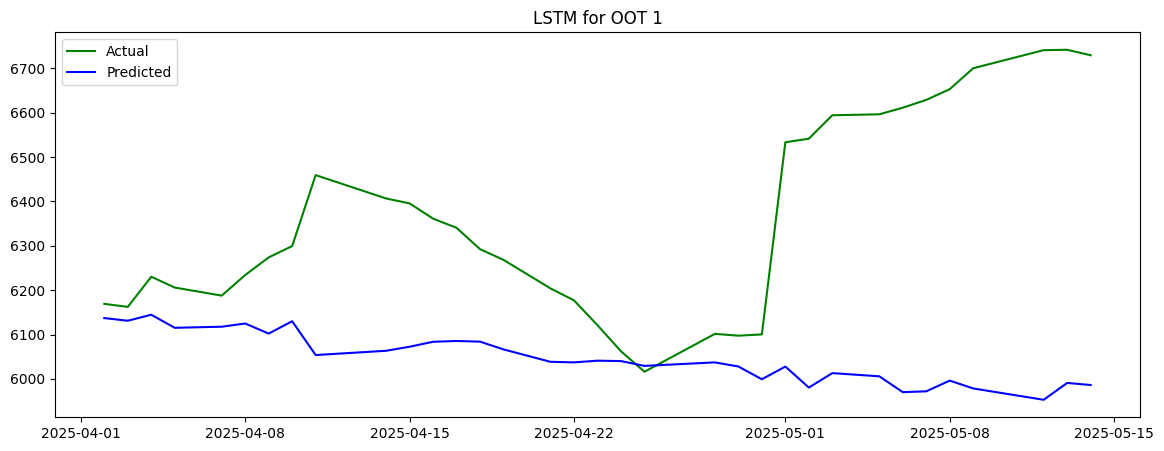


 Error Metrics are:
         MSE    RMSE     MAE  MAPE (%)  SMAPE (%)
0  163935.94  404.89  312.75      4.79       4.98
Run for OOT 1 completed
Run for OOT 1 completed


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


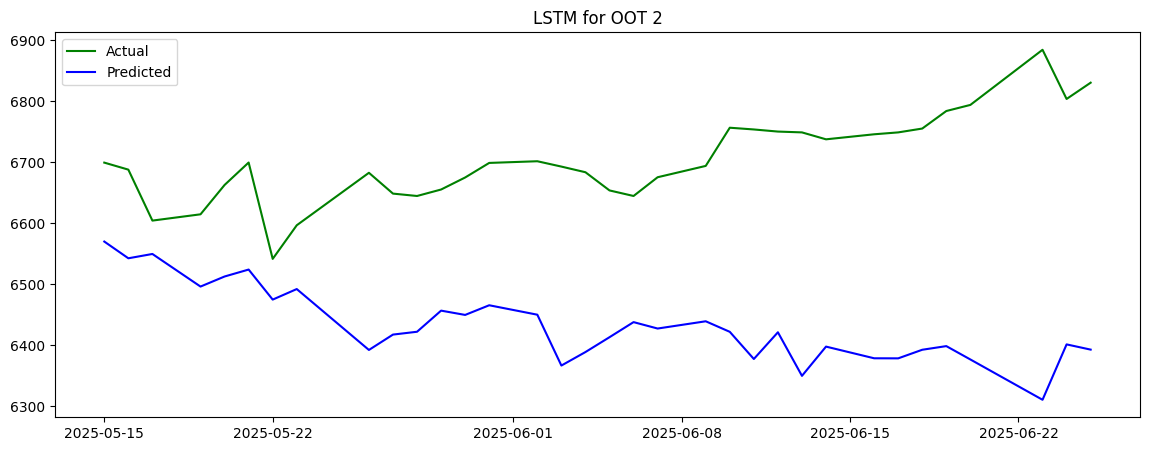


 Error Metrics are:
        MSE    RMSE     MAE  MAPE (%)  SMAPE (%)
0  87605.44  295.98  272.21      4.04       4.14
Run for OOT 2 completed
Run for OOT 2 completed


In [ ]:
df_lstm = prices
mape_LSTM = 0

if 'Date' in df_lstm.columns:
  df_lstm_indexed = df_lstm.set_index('Date')
# train_df_LSTM_ndays, oot1_df_LSTM_ndays , oot2_df_LSTM_ndays , oot3_df_LSTM_ndays , oot4_df_LSTM_ndays = split_data_4_OOTs(df_lstm_indexed)
train_df_LSTM_ndays, oot1_df_LSTM_ndays , oot2_df_LSTM_ndays = split_data(df_lstm_indexed)
print(len(oot1_df_LSTM_ndays))
print(len(oot2_df_LSTM_ndays))
LSTM_scaler = MinMaxScaler()
scaler =  LSTM_scaler
seq_len = 333
n_lookback = 333  # length of input sequences (lookback period)
n_forecast = min(len(oot1_df_LSTM_ndays) , len(oot2_df_LSTM_ndays) ) # length of output sequences (forecast period)

for i in range(1 , 3): #to iterate for all 2 oots
  get_LSTM_ndays_OOT_results(train_df_LSTM_ndays , globals()[f'oot{i}_df_LSTM_ndays'] , n_forecast, OOTn = i , i_oot = 1 , use_existing_tuner = True )
  train_df_LSTM_ndays = pd.concat([train_df_LSTM_ndays , globals()[f'oot{i}_df_LSTM_ndays']]) #updates train_df to include current oot
mape_LSTM = mape_LSTM/2




#Arima N days

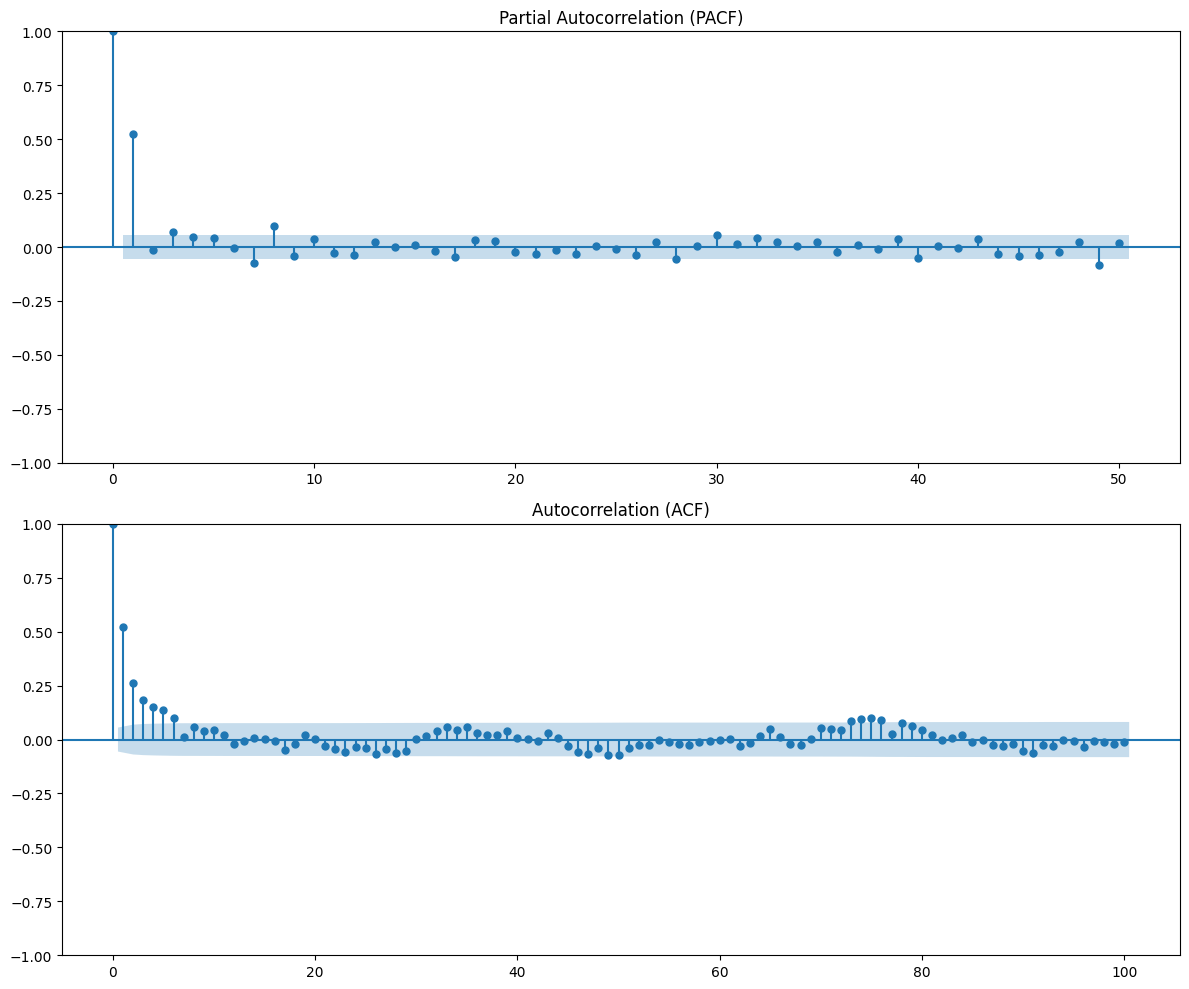

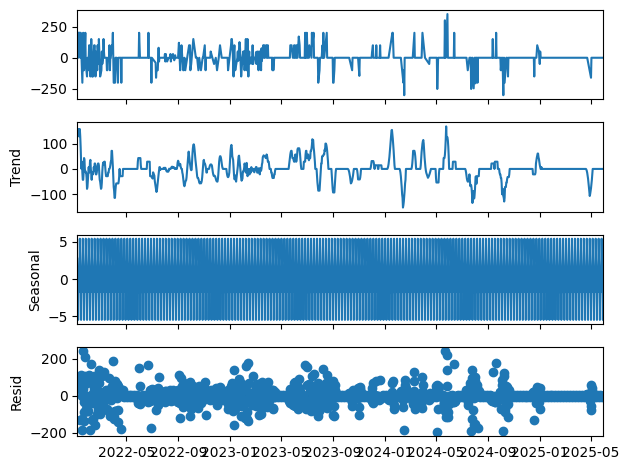

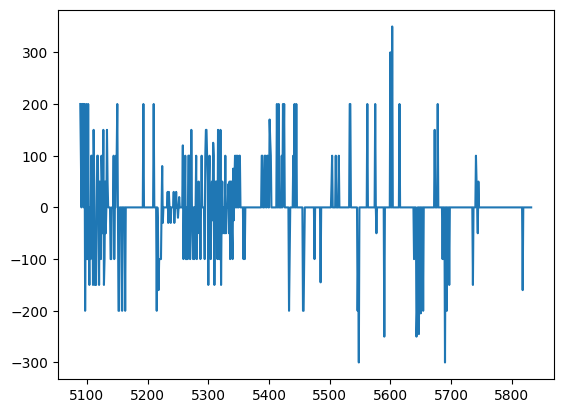

In [ ]:
a = prices['Price'].diff()
a.dropna(inplace = True)
#checking PCF and ACF plots post differencing once
f_temp = Forecaster_with_missing_vals(
    y= a,
    current_dates=prices['Date'][1:],
    desired_frequency='D',
    fill_strategy='linear_interp'
)
f = Forecaster(
    y=f_temp.y,
    current_dates=f_temp.current_dates,
    freq='D'
)

plt.figure(figsize=(12, 10))

# PACF plot
plt.subplot(2, 1, 1)
f.plot_pacf(lags=50, ax=plt.gca())
plt.title('Partial Autocorrelation (PACF)')

# ACF plot
plt.subplot(2, 1, 2)
f.plot_acf(lags=100, ax=plt.gca())
plt.title('Autocorrelation (ACF)')

plt.tight_layout()
plt.show()

# Seasonal Decomposition plot (separate full plot)
f.seasonal_decompose().plot()
plt.show()

plt.plot(a)


In [ ]:
from statsforecast.models import ARIMA


In [ ]:
# train_df_arima , oot1_df_arima, oot2_df_arima = split_data(df_arima)
# train_df_arima.iloc[-1]


ARIMA(2,1,2)(1,1,1)[5]                   :8134.231605832662

ARIMA(0,1,0)(0,1,0)[5]                   :8517.174184231942

ARIMA(1,1,0)(1,1,0)[5]                   :8324.052740116547

ARIMA(0,1,1)(0,1,1)[5]                   :8118.926462563922

ARIMA(0,1,1)(0,1,0)[5]                   :8518.929536120266

ARIMA(0,1,1)(1,1,1)[5]                   :8129.7800179822325

ARIMA(0,1,1)(0,1,2)[5]                   :8120.882208139073

ARIMA(0,1,1)(1,1,0)[5]                   :8324.08338823034

ARIMA(0,1,1)(1,1,2)[5]                   :8111.476023734811

ARIMA(0,1,1)(2,1,2)[5]                   :8109.349131797101

ARIMA(0,1,1)(2,1,1)[5]                   :8123.675637877713

ARIMA(0,1,0)(2,1,2)[5]                   :8113.8669982411975

ARIMA(1,1,1)(2,1,2)[5]                   :inf

ARIMA(0,1,2)(2,1,2)[5]                   :8111.44936767743

ARIMA(1,1,0)(2,1,2)[5]                   :8090.482912645185

ARIMA(1,1,0)(1,1,2)[5]                   :8111.38857367187

ARIMA(1,1,0)(2,1,1)[5]                

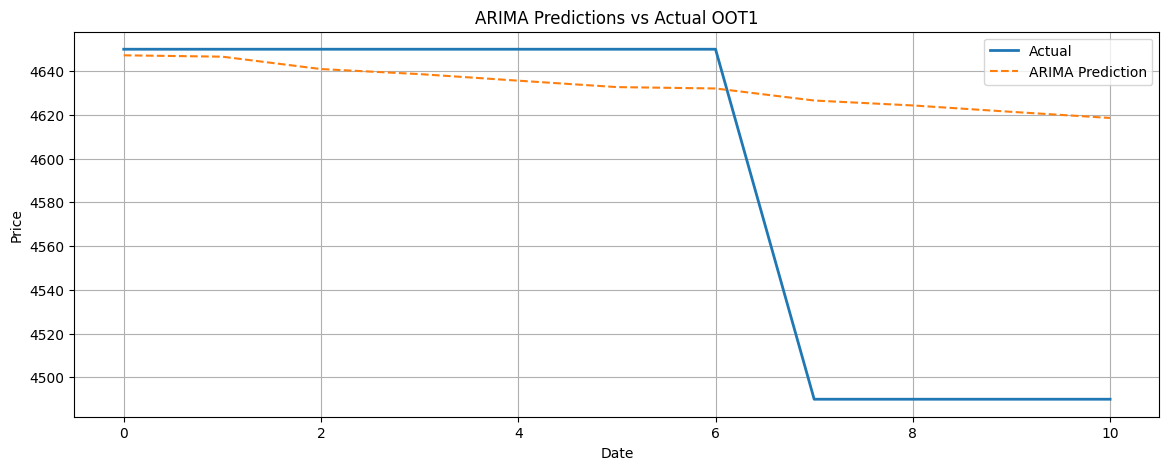


ARIMA(2,1,2)(1,1,1)[5]                   :8253.421356863164

ARIMA(0,1,0)(0,1,0)[5]                   :8640.617024419167

ARIMA(1,1,0)(1,1,0)[5]                   :8445.337197112656

ARIMA(0,1,1)(0,1,1)[5]                   :8238.182745725746

ARIMA(0,1,1)(0,1,0)[5]                   :8642.370474544587

ARIMA(0,1,1)(1,1,1)[5]                   :8249.080702429395

ARIMA(0,1,1)(0,1,2)[5]                   :8240.13321241037

ARIMA(0,1,1)(1,1,0)[5]                   :8445.368256074207

ARIMA(0,1,1)(1,1,2)[5]                   :8230.525367319035

ARIMA(0,1,1)(2,1,2)[5]                   :8228.311009717327

ARIMA(0,1,1)(2,1,1)[5]                   :8242.885012902274

ARIMA(0,1,0)(2,1,2)[5]                   :8232.808854878376

ARIMA(1,1,1)(2,1,2)[5]                   :inf

ARIMA(0,1,2)(2,1,2)[5]                   :8230.411678072644

ARIMA(1,1,0)(2,1,2)[5]                   :8209.127344086324

ARIMA(1,1,0)(1,1,2)[5]                   :8230.435737542883

ARIMA(1,1,0)(2,1,1)[5]                

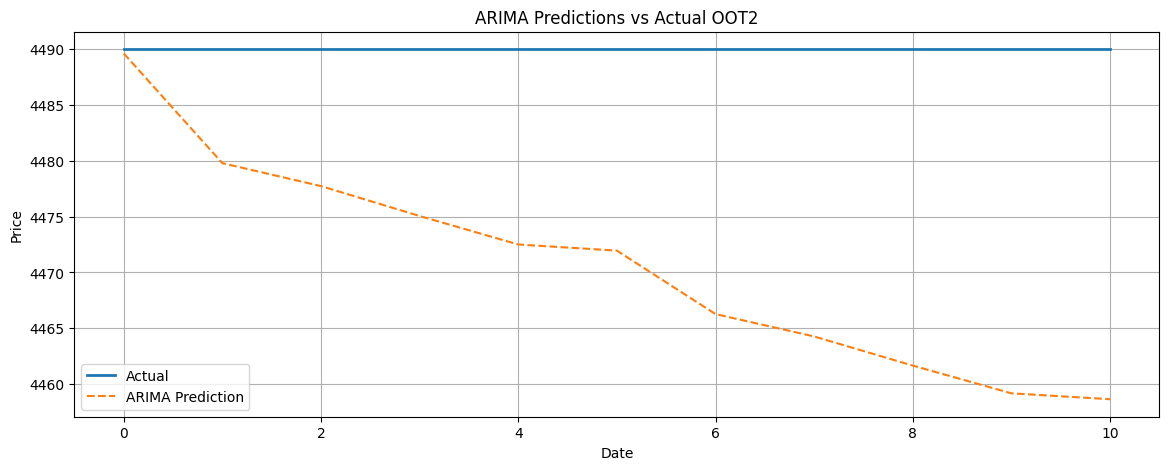

In [ ]:
df_arima = prices.copy()
df_arima['Date'] = pd.to_datetime(df_arima['Date'])
df_arima.set_index('Date', inplace=True)

def arima_rename(df):
  df = df.reset_index().rename(columns={'Date': 'ds', 'Price': 'y'})
  df['unique_id'] = f'{current_crop}_price_series'
  return df

train_df_arima , oot1_df_arima, oot2_df_arima = split_data(df_arima)
arima_oot_sets = [oot1_df_arima , oot2_df_arima]
train_df_arima, oot1_df_arima, oot2_df_arima = [arima_rename(df) for df in [train_df_arima, oot1_df_arima, oot2_df_arima]]

def get_arima_hp(sf):

  sf_list = list(sf.fitted_[0][0].model_['arma'])
  sf_df = pd.DataFrame({
    'season_length': sf_list[4], # Correct index for season_length
    'max_p': sf_list[0],         # Correct index for max_p
    'max_q': sf_list[1],         # Correct index for max_q
    'max_d': sf_list[3],         # Correct index for d
    'd': sf_list[5],             # Correct index for D
    'D': sf_list[6]              # Correct index for D
  }, index=['AutoARIMA_1']) # Explicitly specify the index
  return sf_df

def get_arima_oot_results(train_df_arima , oot_df_arima):
  sf= StatsForecast(
    models=[AutoARIMA(season_length=5, max_p=5, max_q=5, max_d=5, d = 1, D = 1, trace=True)],
    freq='B',
    n_jobs=1,
    verbose=0,)
  sf = sf.fit(train_df_arima)
  hp = get_arima_hp(sf)
  # print(hp)
  return sf , hp

mape_arima  = 0
for i in range (1, len(arima_oot_sets) + 1):

  current_oot = globals()[f'oot{i}_df_arima']
  current_oot = arima_rename(current_oot)
  hyperparameters_path = root_path + 'Models/' + f'{current_crop}_Arima_hyperparameters.txt'

  arima_model , hp = get_arima_oot_results(train_df_arima, current_oot)
  # arima_model.fit(train_df_arima)
  hp.to_json(hyperparameters_path)

  # Fit model (regardless of path taken above)
  # sf = StatsForecast(
  #     models=[arima_model],
  #     freq='B',
  #     # n_jobs=1,
  #     # verbose=0
  # )
  # print(train_df_arima['y'].values)
  # sf = sf.fit(train_df_arima)

  forecast= arima_model.predict(h=n_forecast)
  print(forecast)
  predicted_vals_arima = forecast['AutoARIMA'].values[0:n_forecast]

  true_vals_arima= current_oot['y'].values[0:n_forecast]
  error = calc_errors(true_vals_arima, predicted_vals_arima)
  print(error)
  mape_arima += error['MAPE (%)']

  predicted_val =  predicted_vals_arima
  actual_val = true_vals_arima[0:n_forecast]
  absolute_error = np.abs(predicted_val - actual_val)
  relative_error = absolute_error / actual_val

  # print(current_oot)
  arima_op = pd.DataFrame({
    'Date': current_oot['ds'][0:n_forecast],
    'Actual Price': actual_val,
    'Predicted Price': predicted_val,
    'Absolute Error': absolute_error,
    'Relative Error': relative_error ,
        'label': f'OOT{i}'
  })
  append_to_excel(excel_path, error, 'ARIMA_HP_Error')
  append_to_excel(excel_path, pd.DataFrame(hp) , 'ARIMA_HP_Error')
  append_to_excel(excel_path, arima_op , 'ARIMA_OOT_results')
  # oot1 Plot: actual vs prediction from train-only model
  plt.figure(figsize=(14,5))
  plt.plot(current_oot.index[0:n_forecast], true_vals_arima, label='Actual', linewidth=2)
  plt.plot(current_oot.index[0:n_forecast], predicted_vals_arima, label='ARIMA Prediction', linestyle='--')
  plt.title(f'ARIMA Predictions vs Actual OOT{i}')
  plt.xlabel('Date')
  plt.ylabel('Price')
  plt.legend()
  plt.grid()
  plt.show()

  train_df_arima = pd.concat([train_df_arima, current_oot])
  train_df_arima = train_df_arima.drop(columns = ['index'])


mape_arima = mape_arima / len(arima_oot_sets)


#XGBoost N days

In [106]:
def get_xgboost_x_y(indices: list, data: np.array, target_sequence_length, input_seq_len: int) -> Tuple[np.array, np.array]:
    """
    Args:
        indices: List of index positions at which data should be sliced
        data: A univariate time series
        target_sequence_length: The forecasting horizon, m
        input_seq_len: The length of the model input, n
    Output:
        all_x: np.array of shape (number of instances, input seq len)
        all_y: np.array of shape (number of instances, target seq len)
    """
    print("Preparing data..")
    for i, idx in enumerate(indices):
        data_instance = data[idx[0]:idx[1]]
        x = data_instance[0:input_seq_len]
        assert len(x) == input_seq_len
        y = data_instance[input_seq_len:input_seq_len+target_sequence_length]
        if i == 0:
            all_y = y.reshape(1, -1)
            all_x = x.reshape(1, -1)
        else:
            all_y = np.concatenate((all_y, y.reshape(1, -1)), axis=0)
            all_x = np.concatenate((all_x, x.reshape(1, -1)), axis=0)
    print("Finished preparing data!")
    return all_x, all_y

def get_indices_entire_sequence(data: pd.DataFrame, window_size: int, step_size: int) -> list:
    """
    Produce all the start and end index positions that is needed to produce
    the sub-sequences.
    Returns a list of tuples. Each tuple is (start_idx, end_idx) of a sub-
    sequence. These tuples should be used to slice the dataset into sub-
    sequences. These sub-sequences should then be passed into a function
    that slices them into input and target sequences.
    Args:
        data (pd.DataFrame): Partitioned data set, e.g. training data
        window_size (int): The desired length of each sub-sequence. Should be
                           (input_sequence_length + target_sequence_length)
                           E.g. if you want the model to consider the past 100
                           time steps in order to predict the future 50
                           time steps, window_size = 100+50 = 150
        step_size (int): Size of each step as the data sequence is traversed
                         by the moving window.
                         If 1, the first sub-sequence will be [0:window_size],
                         and the next will be [1:window_size].
    Return:
        indices: a list of tuples
    """
    stop_position = len(data)-1
    subseq_first_idx = 0
    subseq_last_idx = window_size
    indices = []
    while subseq_last_idx <= stop_position:
        indices.append((subseq_first_idx, subseq_last_idx))
        subseq_first_idx += step_size
        subseq_last_idx += step_size
    return indices


In [ ]:
print(current_crop)

Mustard


In [108]:
xgb_nseq_train_df = xgb_nseq_train_df[xgb_nseq_train_df.index > '2024-04-01']
print(xgb_nseq_train_df)


              Price
Date               
2024-04-04  5503.90
2024-04-09  5454.95
2024-05-17  5785.70
2024-05-21  5991.60
2024-05-22  6000.25
...             ...
2025-03-25  6205.90
2025-03-26  6187.70
2025-03-27  6234.05
2025-03-28  6273.90
2025-03-29  6299.50

[204 rows x 1 columns]


Preparing data..
Finished preparing data!
x_train shape: (50, 34), y_train shape: (50, 34)
Test 1 - x_test shape: (1, 34), y_test shape: (1, 34)
Preparing data..
Finished preparing data!
OOT 1 MAE: 177.14129136029408

 Error Metrics are:
        MSE    RMSE     MAE  MAPE (%)  SMAPE (%)
0  78781.96  280.68  177.14      2.67       2.76


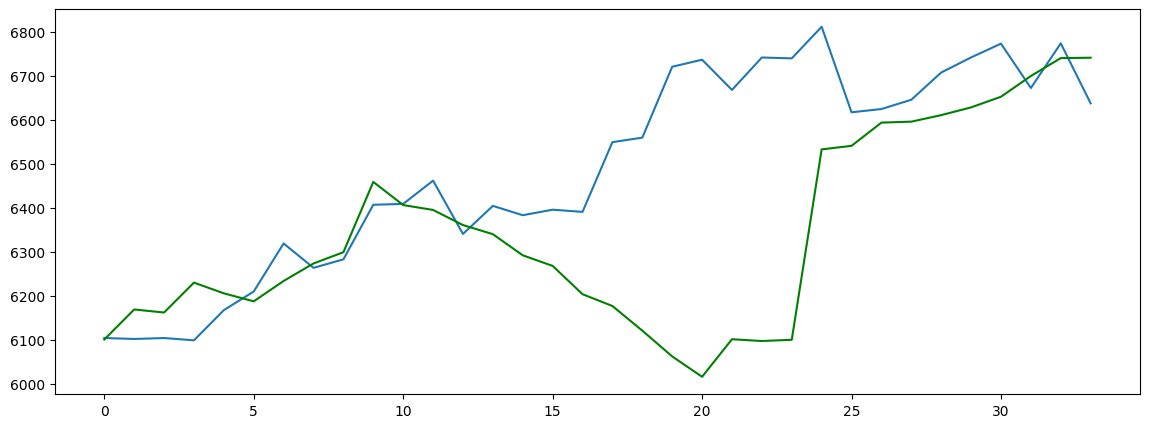

/usr/local/lib/python3.11/dist-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")
/usr/local/lib/python3.11/dist-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")
/usr/local/lib/python3.11/dist-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


Test 2 - x_test shape: (1, 34), y_test shape: (1, 34)
Preparing data..
Finished preparing data!
OOT 2 MAE: 144.81231043198528

 Error Metrics are:
        MSE    RMSE     MAE  MAPE (%)  SMAPE (%)
0  31532.73  177.57  144.81      2.17       2.17


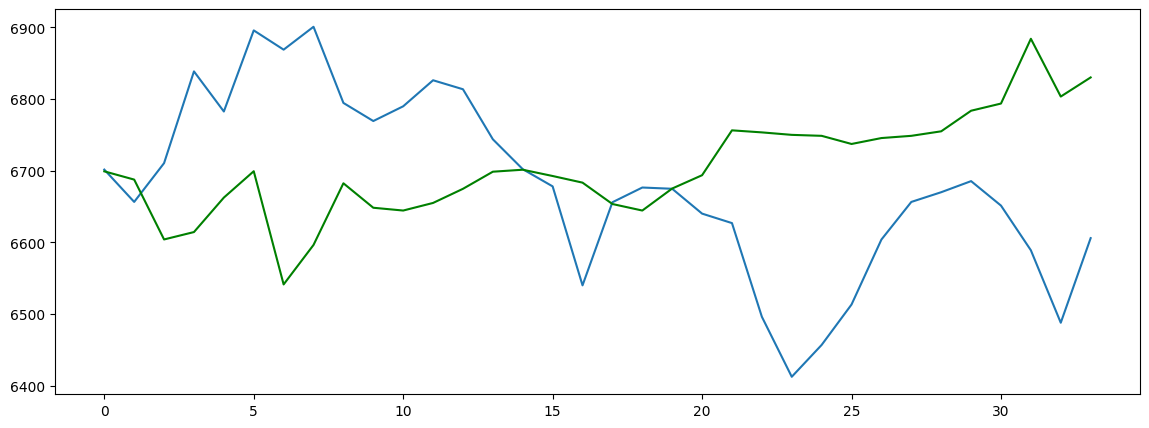

/usr/local/lib/python3.11/dist-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")
/usr/local/lib/python3.11/dist-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")
/usr/local/lib/python3.11/dist-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


Average MAPE across OOTs: 0    2.42
Name: MAPE (%), dtype: float64%


In [138]:
df_xgb_nseq = prices.copy()
df_xgb_nseq['Date'] = pd.to_datetime(df_xgb_nseq['Date'])
df_xgb_nseq.set_index('Date', inplace=True)
xgb_nseq_train_df , xgb_nseq_oot1_df, xgb_nseq_oot2_df = split_data(df_xgb_nseq)
# xgb_nseq_train_df = xgb_nseq_train_df[xgb_nseq_train_df.index > '2024-04-01']


from bayes_opt import BayesianOptimization
from sklearn.model_selection import TimeSeriesSplit
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# -------------------- SETUP -------------------- #

target_variable = "Price"
timestamp_col = "Date"
target_sequence_length = n_forecast
test_size = 0.20
mape_xgb = 0


hyperparameters = {
    "in_length": n_forecast,
    "step_size": 12,
    "selected_features": [target_variable]
}

training_data = xgb_nseq_train_df

# -------------------- Prepare Train Data -------------------- #

training_indices = get_indices_entire_sequence(
    data=training_data,
    window_size=hyperparameters["in_length"] + target_sequence_length,
    step_size=hyperparameters["step_size"]
)

x_train, y_train = get_xgboost_x_y(
    indices=training_indices,
    data=training_data[hyperparameters["selected_features"]].to_numpy(),
    target_sequence_length=target_sequence_length,
    input_seq_len=hyperparameters["in_length"]
)

print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")

# -------------------- Bayesian Optimization -------------------- #

tscv = TimeSeriesSplit(n_splits=3)

def bo_params_xgb(max_depth, gamma, learning_rate, n_estimators, subsample):

    params = {
        'max_depth': int(max_depth),
        'gamma': gamma,
        'learning_rate': learning_rate,
        'subsample': subsample,
        'n_estimators': int(n_estimators),
        'random_state': 123
    }

    fold_scores = []

    for train_index, val_index in tscv.split(x_train):
        X_tr, X_val = x_train[train_index], x_train[val_index]
        y_tr, y_val = y_train[train_index], y_train[val_index]

        model = MultiOutputRegressor(XGBRegressor(**params))
        model.fit(X_tr, y_tr)

        y_pred = model.predict(X_val)

        # Compute MAPE carefully (avoid division by zero)
        epsilon = 1e-8  # small constant to avoid division by zero
        mape_per_target = (np.abs(y_pred - y_val) / (np.abs(y_val) + epsilon)).mean(axis=0)
        avg_mape = mape_per_target.mean()

        fold_scores.append(-avg_mape)  # Negative because Bayesian Optimization maximizes

    return np.mean(fold_scores)

xgb_path = root_path + 'Models/' + f'XGBoost_{current_crop}'
if os.path.exists(xgb_path):
  final_model = joblib.load(xgb_path)
else:

  xgb_bo = BayesianOptimization(
      bo_params_xgb,
      {
          'max_depth': (3, 10),
          'gamma': (0, 1),
          'learning_rate': (0.01, 0.3),
          'subsample': (0.5, 1),
          'n_estimators': (100, 500)
      },
      random_state=42
  )

  print("Starting Bayesian Optimization...")
  xgb_bo.maximize(init_points=5, n_iter=2)

  # Extract best hyperparameters
  best_params = xgb_bo.max['params']
  best_params['max_depth'] = int(best_params['max_depth'])
  best_params['n_estimators'] = int(best_params['n_estimators'])

  print("Best Hyperparameters Found:", best_params)

  # -------------------- Define Final Model -------------------- #

  final_model = MultiOutputRegressor(
      XGBRegressor(
          max_depth=best_params['max_depth'],
          gamma=best_params['gamma'],
          learning_rate=best_params['learning_rate'],
          subsample=best_params['subsample'],
          n_estimators=best_params['n_estimators'],
          objective="reg:squarederror",
          tree_method="hist",
          random_state=123
      )
  )
  joblib.dump(final_model, xgb_path)
# -------------------- OOT Evaluation -------------------- #

for i in range(1, 3):

    test_data = globals()[f'xgb_nseq_oot{i}_df']

    x_test = np.array(training_data[-1 * hyperparameters["in_length"]:].transpose())
    y_test = np.array(test_data[0:n_forecast].transpose())

    print(f"Test {i} - x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")


    training_indices = get_indices_entire_sequence(
        data=training_data,
        window_size=hyperparameters["in_length"] + target_sequence_length,
        step_size=hyperparameters["step_size"]
    )

    x_train, y_train = get_xgboost_x_y(
        indices=training_indices,
        data=training_data[hyperparameters["selected_features"]].to_numpy(),
        target_sequence_length=target_sequence_length,
        input_seq_len=hyperparameters["in_length"]
    )


    trained_model = final_model.fit(x_train, y_train)
    test_forecasts = trained_model.predict(x_test)

    test_mae = mean_absolute_error(y_test, test_forecasts)
    print(f"OOT {i} MAE: {test_mae}")

    plt.figure(figsize=(14,5))
    plt.plot(pd.Series(test_forecasts[0]) , label = 'Predicted')
    plt.plot(y_test[0], color="green" , label = 'Actual')
    error_xgb = calc_errors(test_forecasts[0], y_test[0])
    print(error_xgb)
    plt.show()

    training_data = pd.concat([training_data, test_data])

    Actual = y_test[0]
    Predicted = test_forecasts[0]
    Absolute_Error = np.abs(Predicted - Actual)
    Relative_Error = Absolute_Error / Actual

    df_xgboost = {
        'Date': test_data.index[0:n_forecast],
        'Actual': Actual,
        'Predicted': Predicted,
        'Label': f'OOT{i}',
        'Absolute Error': Absolute_Error,
        'Relative Error': Relative_Error
    }

    mape_xgb += error_xgb['MAPE (%)']
    append_to_excel(excel_path, pd.DataFrame([trained_model.get_params()], index=['XGBoost']), 'XGBoost_params_Error')
    append_to_excel(excel_path, error_xgb, 'XGBoost_params_Error')
    append_to_excel(excel_path, pd.DataFrame(df_xgboost), 'XGBoost_OOT_results')

mape_xgb = mape_xgb/2
print(f"Average MAPE across OOTs: {mape_xgb}%")


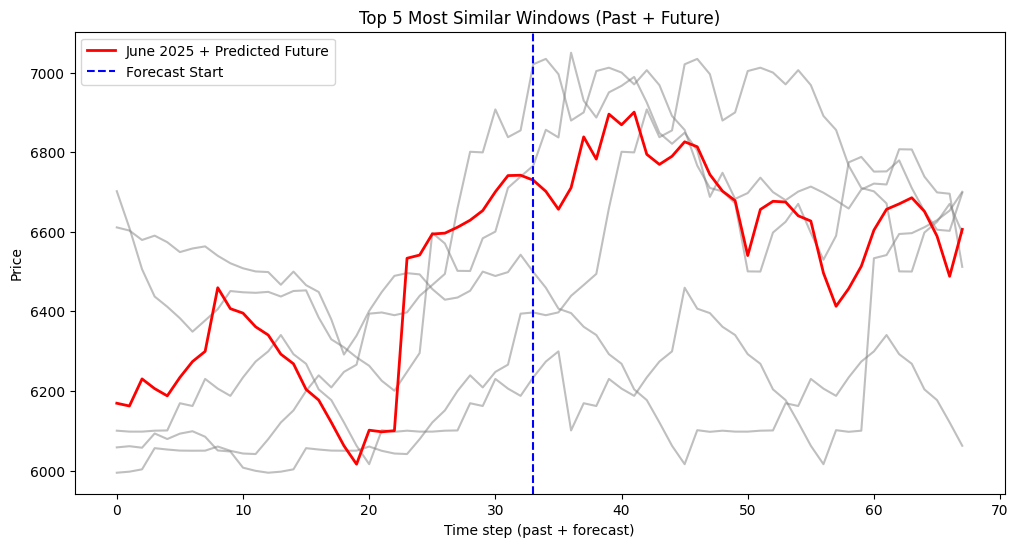

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

# Step 1: Extract last window (June 2025)
target_window = x_test[0].reshape(1, -1)

# Step 2: Compute similarity to all training windows
distances = euclidean_distances(target_window, x_train).flatten()

# Step 3: Get top-k closest windows
k = 5
nearest_indices = distances.argsort()[:k]

# Step 4: Combined plot
plt.figure(figsize=(12,6))

for idx in nearest_indices:
    combined = np.concatenate([x_train[idx], y_train[idx]])  # past + future
    plt.plot(range(len(combined)), combined, alpha=0.5, color='gray')

# June 2025 input + its prediction
combined_target = np.concatenate([x_test[0], test_forecasts[0]])
plt.plot(range(len(combined_target)), combined_target, color='red', linewidth=2, label='June 2025 + Predicted Future')

plt.axvline(len(x_test[0])-1, color='blue', linestyle='--', label='Forecast Start')
plt.title(f"Top {k} Most Similar Windows (Past + Future)")
plt.xlabel("Time step (past + forecast)")
plt.ylabel("Price")
plt.legend()
plt.show()


#Ensemble Module

In [ ]:
avg_mape_LSTM = float(mape_LSTM)
avg_mape_XGB = float(mape_xgb)
avg_mape_ARIMA = float(mape_arima)
print(float(avg_mape_LSTM))
print(avg_mape_XGB)
print(avg_mape_ARIMA  )

In [ ]:
t , o1, o2 = split_data(df)
print(len(o1) )
print(len(o2))
len_o = len(o1) + len(o2)

In [ ]:
pd.set_option('display.max_rows', 1000)

In [ ]:

avg_mape_LSTM = float(mape_LSTM.iloc[0])
avg_mape_XGB = float(mape_xgb.iloc[0])
avg_mape_ARIMA = float(mape_arima.iloc[0])

LSTM_n_pred = pd.read_excel(excel_path , sheet_name = 'LSTM_ndays_OOT_results').iloc[0:len_o]['Predicted']
XGB_n_pred = pd.read_excel(excel_path , sheet_name = 'ARIMA_OOT_results').iloc[0:len_o]['Predicted Price']
ARIMA_n_pred = pd.read_excel(excel_path , sheet_name = 'ARIMA_OOT_results').iloc[0:len_o]['Predicted Price']
actual = pd.read_excel(excel_path , sheet_name = 'LSTM_ndays_OOT_results').iloc[0:len_o]['Actual']
date = pd.read_excel(excel_path , sheet_name = 'LSTM_ndays_OOT_results').iloc[0:len_o]['Date']

best_model = max(avg_mape_LSTM, avg_mape_XGB, avg_mape_ARIMA)
mape_dic = {
    'LSTM': avg_mape_LSTM ,
    'XGB': avg_mape_XGB ,
    'ARIMA': avg_mape_ARIMA
}
print(mape_dic)
best_model = sorted(mape_dic, key=mape_dic.get)[0]

best_2nd_model =  sorted(mape_dic, key=mape_dic.get)[1]

best_model_mape = float(mape_dic[best_model])
best_2nd_model_mape = float(mape_dic[best_2nd_model])

LSTM_n_pred = LSTM_n_pred.dropna()
XGB_n_pred = XGB_n_pred.dropna()
ARIMA_n_pred = ARIMA_n_pred.dropna()
actual = actual.dropna()

ensemble_condidion = True
threshold = 1



# print(globals()[f'{best_model}_n_pred'])
print(best_model_mape)
print(best_2nd_model_mape)
if (abs(best_model_mape - best_2nd_model_mape)) < threshold:
  # print('hi')
  globals()[f"{best_model}_n_pred"] = globals()[f"{best_model}_n_pred"].dropna()
  globals()[f"{best_2nd_model}_n_pred"] = globals()[f"{best_2nd_model}_n_pred"].dropna()
  ensemble_pred  = (globals()[f"{best_model}_n_pred"] + globals()[f"{best_2nd_model}_n_pred"]) /2
  ensemble_pred = ensemble_pred.dropna()
  absolute_error = np.abs(actual - ensemble_pred)
  relative_error = absolute_error/actual
  ensemble_df = pd.DataFrame({
        "Date": date ,
        "Ensemble": ensemble_pred,
        "Actual": actual ,
        "Absolute Error": absolute_error,
        "Relative Error": relative_error

    })
  append_to_excel(excel_path, ensemble_df, 'Ensemble_pred')

#   print(f"{best_2nd_model}_n_pred")
else:
  ensemble_condidion = False

# print(pd.DataFrame(ensemble_pred).head(70))
# print(globals()[f"{best_model}_n_pred"])
# print(globals()[f"{best_2nd_model}_n_pred"])
if ensemble_condidion:
  error_ensemble = calc_errors(actual , ensemble_pred)
  print(error_ensemble)
else:
  print("No Ensemble")



In [ ]:
raise SystemExit("🛑 Stopping execution in Colab")


#Future Predictions

In [102]:
current_datetime = datetime.now()
current_date = date.today()
# excel_path = f"{root_path}/Output/{current_crop}_{current_datetime}.xlsx"
excel_path = f"{root_path}/Output/Output_090725/Future_predictions.xlsx"
if os.path.exists(excel_path):
  mode_val = 'a'
else:
  mode_val = 'w'

# with pd.ExcelWriter(excel_path  , engine = 'openpyxl' , mode = mode_val) as writer:
#     prices.to_excel(writer , sheet_name = 'Actual')

# prices_full.to_excel(writer , sheet_name = 'Parameters')

# Future Predictions Arima

In [ ]:
# Soyabean - Arima
if best_model == 'ARIMA':
  df_arima = prices.copy()
  df_arima['Date'] = pd.to_datetime(df_arima['Date'])
  df_arima.set_index('Date', inplace=True)

  def arima_rename(df):
    df = df.reset_index().rename(columns={'Date': 'ds', 'Price': 'y'})
    df['unique_id'] = f'{current_crop}_price_series'
    return df

  train_df_arima = df_arima
  train_df_arima = train_df_arima[train_df_arima.index < '2025-06-15']
  train_df_arima = arima_rename(train_df_arima)

  def get_arima_hp(sf):

    sf_list = list(sf.fitted_[0][0].model_['arma'])
    sf_df = pd.DataFrame({
      'season_length': sf_list[4], # Correct index for season_length
      'max_p': sf_list[0],         # Correct index for max_p
      'max_q': sf_list[1],         # Correct index for max_q
      'max_d': sf_list[3],         # Correct index for d
      'd': sf_list[5],             # Correct index for D
      'D': sf_list[6]              # Correct index for D
    }, index=['AutoARIMA_1']) # Explicitly specify the index
    return sf_df

  def get_arima_oot_results(train_df_arima):
    sf= StatsForecast(
      models=[AutoARIMA(season_length=5, max_p=5, max_q=5, max_d=5, d = 1, D = 1, trace=True)],
      freq='B',
      n_jobs=1,
      verbose=0,)
    sf = sf.fit(train_df_arima)
    hp = get_arima_hp(sf)
    # print(hp)
    return sf , hp

  arima_model , hp = get_arima_oot_results(train_df_arima)

  n_future_prediction = 66
  forecast= arima_model.predict(h= n_future_prediction)
  print(forecast)

  forecast_df = pd.DataFrame({'Date': forecast['ds'] , 'Prediction':forecast['AutoARIMA'] , 'Percentage_Change': forecast['AutoARIMA'].pct_change() * 100 })
  append_to_excel(excel_path, forecast_df , f'ARIMA_future_predictions_{current_crop}')


#Computing Volatility

In [ ]:
# prices_vol

In [ ]:

# Load the price data
prices_vol = prices.copy()

# Prepare the DataFrame
df_vol = prices_vol.copy()
df_vol['year'] = df_vol['Date'].dt.year
df_vol['month'] = df_vol['Date'].dt.month

# Group by year and month, calculate required stats
monthly_stats = df_vol.groupby(['year', 'month'])['Price'].agg(['mean', 'std', 'min', 'max']).reset_index()
monthly_stats['max_min_diff'] = monthly_stats['max'] - monthly_stats['min']
monthly_stats_rounded = monthly_stats.round(2)

# Show the table
print("📊 Monthly Price Statistics (Per Year):")
print(monthly_stats_rounded)

# Bar plot: max-min difference
plt.figure(figsize=(14, 5))
plt.bar(
    monthly_stats['year'].astype(str) + '-' + monthly_stats['month'].astype(str).str.zfill(2),
    monthly_stats['max_min_diff'],
    color='coral'
)
plt.xticks(rotation=90)
plt.ylabel('Price Range (Max - Min)')
plt.title('Monthly Price Swings (Max - Min Difference)')
plt.tight_layout()
plt.show()

# Heatmap: standard deviation
std_pivot = monthly_stats.pivot(index='year', columns='month', values='std')

plt.figure(figsize=(12, 5))
sns.heatmap(std_pivot, annot=True, cmap='YlGnBu', fmt=".2f", cbar_kws={'label': 'Std Dev'})
plt.title(f'Standard Deviation of Prices (Monthly) for {current_crop}')
plt.xlabel('Month')
plt.ylabel('Year')
plt.tight_layout()
plt.show()


last_6_months = df_vol['Date'].max() - pd.DateOffset(months=6)
recent_stats = df_vol[df_vol['Date'] >= last_6_months]
recent_std = recent_stats.groupby([recent_stats['Date'].dt.year, recent_stats['Date'].dt.month])['Price'].std()

volatility = False
if (recent_std > 100).any():
  volatility = True

print(f"Volatility for {current_crop} is" , volatility)

#Xgboost rolling future predictions with retraining

In [115]:
# Prepare full data
best_model = 'XGB'
volatility = True
if best_model == 'XGB' and volatility == True:
  df_xgb_nseq = prices.copy()
  df_xgb_nseq['Date'] = pd.to_datetime(df_xgb_nseq['Date'])
  df_xgb_nseq.set_index('Date', inplace=True)

  training_data = df_xgb_nseq.copy()

  # Prepare training data
  training_indices = get_indices_entire_sequence(
      data=training_data,
      window_size=hyperparameters["in_length"] + target_sequence_length,
      step_size=hyperparameters["step_size"]
  )

  x_train, y_train = get_xgboost_x_y(
      indices=training_indices,
      data=training_data[hyperparameters["selected_features"]].to_numpy(),
      target_sequence_length=target_sequence_length,
      input_seq_len=hyperparameters["in_length"]
  )

  # Prepare test input for next forecast
  x_test = np.array(training_data[-1 * hyperparameters["in_length"]:].transpose())

  # Load and retrain model
  xgb_path = root_path + 'Models/' + f'XGBoost_{current_crop}'
  final_model = joblib.load(xgb_path)
  trained_model = final_model.fit(x_train, y_train)

  # Generate forecast
  test_forecasts = trained_model.predict(x_test)

  # Generate prediction dates (business days)
  last_date = training_data.index[-1]
  prediction_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_forecast, freq='B')

  # Create forecast DataFrame
  forecast_df = pd.DataFrame({
      'Date': prediction_dates,
      'Predicted': test_forecasts.flatten()
  })

  print(forecast_df)
  append_to_excel(excel_path , forecast_df , f'{current_crop}_XGBoost_future_predictions')
  # prediction_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_forecast, freq='B')


Preparing data..
Finished preparing data!
         Date    Predicted
0  2025-06-26  6766.879883
1  2025-06-27  6729.396484
2  2025-06-30  6815.842285
3  2025-07-01  6693.649414
4  2025-07-02  6547.419434
5  2025-07-03  6474.813477
6  2025-07-04  6563.567871
7  2025-07-07  6732.762695
8  2025-07-08  6578.932129
9  2025-07-09  6481.705566
10 2025-07-10  6468.576172
11 2025-07-11  6465.351562
12 2025-07-14  6307.695312
13 2025-07-15  6339.765137
14 2025-07-16  6238.817383
15 2025-07-17  6379.944824
16 2025-07-18  6310.839355
17 2025-07-21  6181.241699
18 2025-07-22  6270.521484
19 2025-07-23  6284.949219
20 2025-07-24  6367.635254
21 2025-07-25  6202.420898
22 2025-07-28  6194.385742
23 2025-07-29  6101.369629
24 2025-07-30  6163.096191
25 2025-07-31  6345.891113
26 2025-08-01  6167.206055
27 2025-08-04  6354.054688
28 2025-08-05  6114.067383
29 2025-08-06  6000.632324
30 2025-08-07  6103.274902
31 2025-08-08  6068.784668
32 2025-08-11  6048.366211
33 2025-08-12  5883.818848


/usr/local/lib/python3.11/dist-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


In [147]:
xgb_nseq_train_df , xgb_nseq_oot1_df, xgb_nseq_oot2_df = split_data(df_xgb_nseq)
print(xgb_nseq_train_df)
print(y_train[-1])

              Price
Date               
2022-01-03  7433.05
2022-01-04  7500.00
2022-01-05  7559.00
2022-01-06  7584.20
2022-01-07  7688.75
...             ...
2025-03-25  6205.90
2025-03-26  6187.70
2025-03-27  6234.05
2025-03-28  6273.90
2025-03-29  6299.50

[660 rows x 1 columns]
[6273.9  6299.5  6100.8  6169.15 6162.25 6230.3  6205.9  6187.7  6234.05
 6273.9  6299.5  6459.45 6406.8  6395.65 6361.3  6340.55 6292.45 6268.3
 6203.95 6177.05 6121.   6062.3  6016.   6101.45 6097.35 6100.2  6533.5
 6541.55 6594.45 6596.6  6611.45 6629.1  6653.3  6700.5 ]


ValueError: x and y must have same first dimension, but have shapes (60,) and (68,)

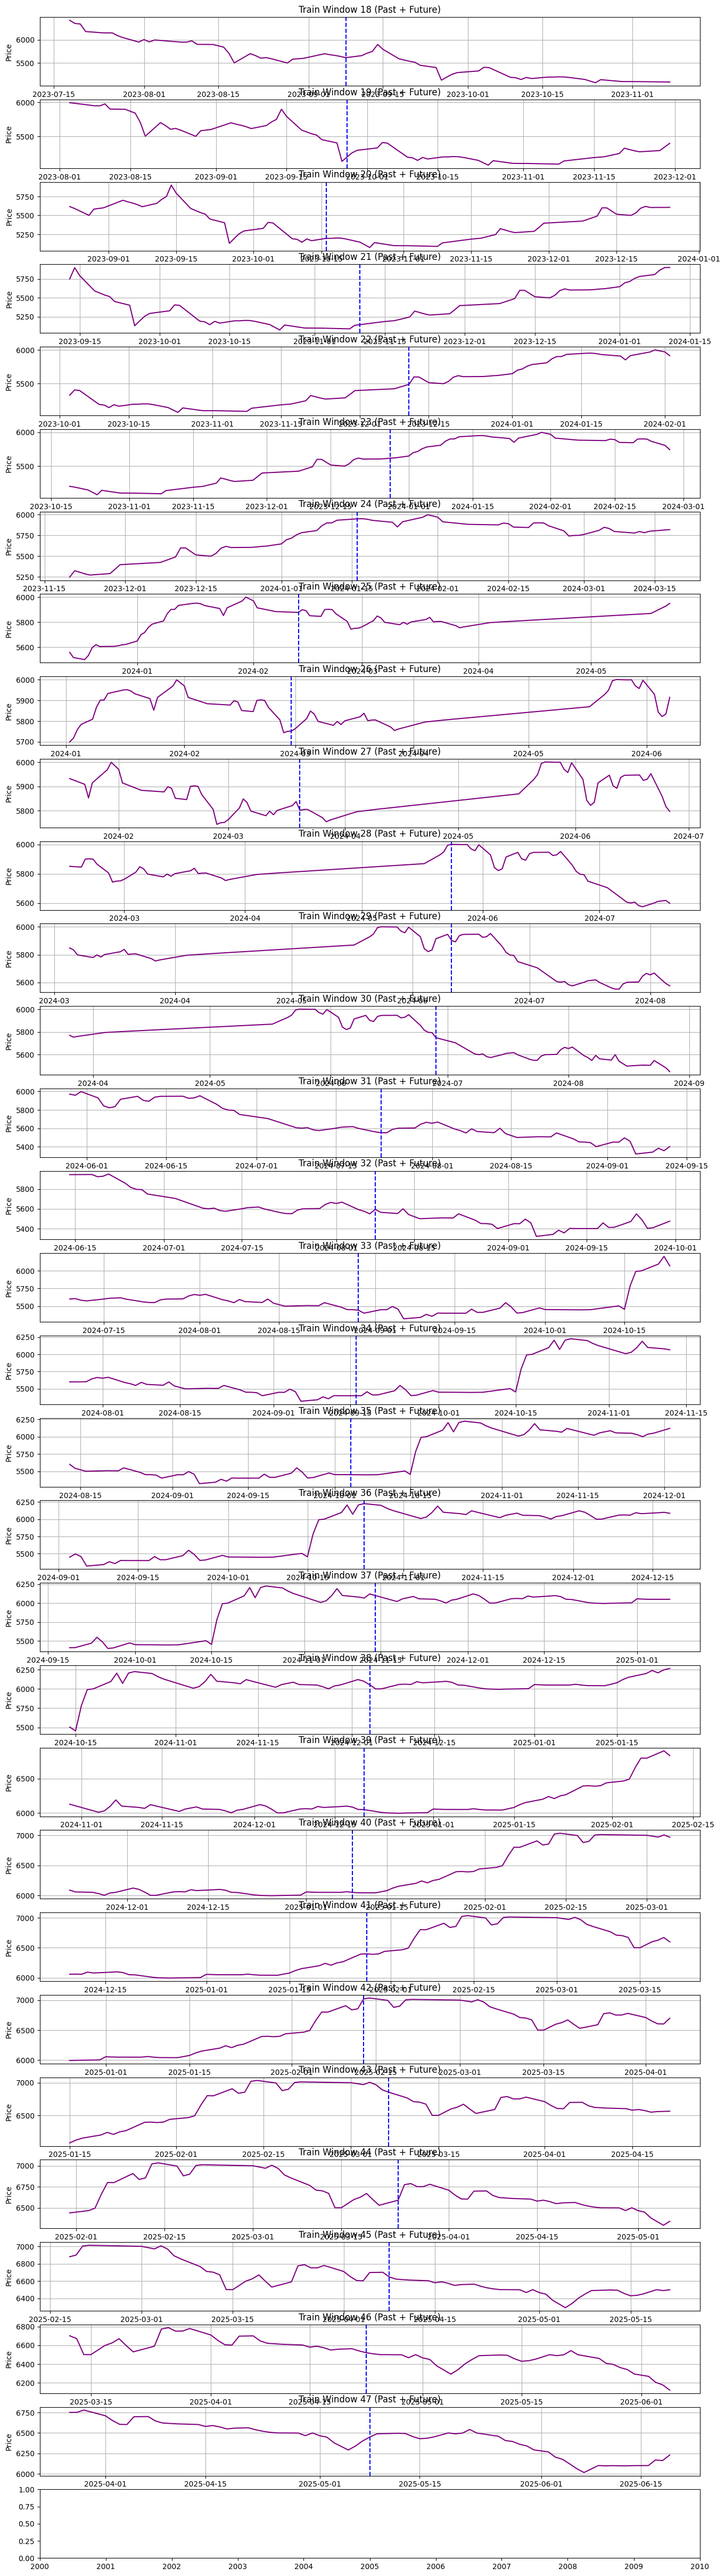

In [137]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

num_windows = 35  # how many recent windows
start_idx = len(x_train) - num_windows

plt.figure(figsize=(16, num_windows * 2))

for i, idx in enumerate(range(start_idx, len(x_train))):
    past_vals = x_train[idx]
    future_vals = y_train[idx]
    combined_vals = np.concatenate([past_vals, future_vals])

    # Build dates for this window
    start = len(training_data) - ((len(x_train) - idx) * hyperparameters["step_size"])
    dates = training_data.index[start : start + len(combined_vals)]

    # Plot
    plt.subplot(num_windows, 1, i+1)
    plt.plot(dates, combined_vals, color='purple')
    plt.axvline(dates[len(past_vals)-1], color='blue', linestyle='--')  # Forecast start
    plt.title(f"Train Window {idx} (Past + Future)")
    plt.ylabel("Price")
    plt.grid(True)

plt.tight_layout()
plt.subplots_adjust(hspace=1.0)  # Add vertical space between subplots
plt.show()


In [124]:
print(prices[prices['Date'] > '2025-05-26'])

        Price       Date
5642  6648.45 2025-05-27
5643  6644.55 2025-05-28
5644  6655.15 2025-05-29
5645  6674.85 2025-05-30
5646  6698.70 2025-05-31
5647  6701.45 2025-06-02
5648  6692.70 2025-06-03
5649  6683.45 2025-06-04
5650  6653.65 2025-06-05
5651  6644.55 2025-06-06
5652  6675.25 2025-06-07
5653  6693.80 2025-06-09
5654  6756.35 2025-06-10
5655  6753.50 2025-06-11
5656  6750.05 2025-06-12
5657  6748.70 2025-06-13
5658  6737.35 2025-06-14
5659  6745.60 2025-06-16
5660  6748.70 2025-06-17
5661  6755.00 2025-06-18
5662  6783.70 2025-06-19
5663  6793.70 2025-06-20
5664  6884.00 2025-06-23
5665  6803.45 2025-06-24
5666  6830.10 2025-06-25


[[-2.4772613e+00  6.0546637e+00  7.1302114e+00  7.3274035e+00
  -3.4327459e-02  1.1560973e+00  2.1155877e+00 -7.2774118e-01
  -6.4964825e-01 -1.1879098e+00 -7.9338217e+00 -1.6212343e+01
  -1.7233359e+00  1.0897053e+01 -1.9437022e+00 -6.3387661e+01
   2.2766714e+00 -2.1263773e-02 -1.6370649e+00 -3.6098417e-02
   4.6578507e+00 -2.9315698e+00  5.0505285e+00 -1.0518730e+00
  -6.6345453e-01  3.2957115e+01 -7.9159651e+00  3.3055073e+01
   3.7657533e+00  2.8159773e+01  7.2403618e+01  1.3846101e+02
   1.6653317e+02  4.6188244e+01]] [[6169.15 6162.25 6230.3  6205.9  6187.7  6234.05 6273.9  6299.5  6459.45
  6406.8  6395.65 6361.3  6340.55 6292.45 6268.3  6203.95 6177.05 6121.
  6062.3  6016.   6101.45 6097.35 6100.2  6533.5  6541.55 6594.45 6596.6
  6611.45 6629.1  6653.3  6700.5  6741.25 6742.1  6729.75]]


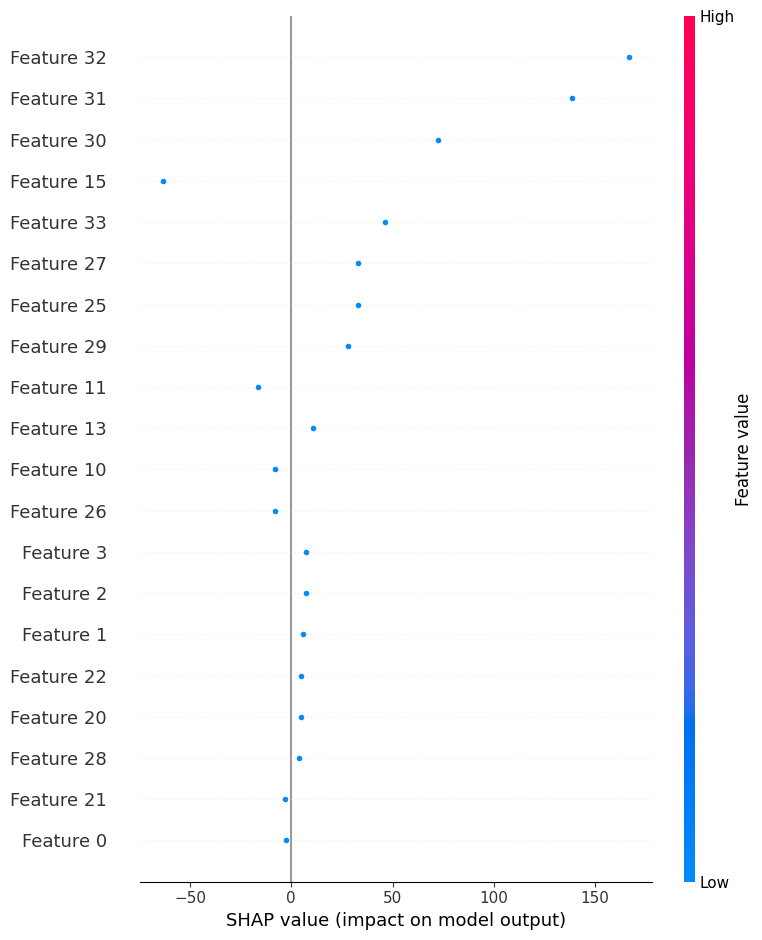

In [121]:
import shap
# Train a single XGB model (not multioutput) for SHAP
xgb = XGBRegressor(**final_model.estimators_[0].get_params())
xgb.fit(x_train, y_train[:,0])  # explain first step forecast

explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(x_test)
print(shap_values , x_test)
shap.summary_plot(shap_values, x_test)


In [114]:
# Prepare full data

if best_model == 'XGB' and volatility == False:
  df_xgb_nseq = prices.copy()
  df_xgb_nseq['Date'] = pd.to_datetime(df_xgb_nseq['Date'])
  df_xgb_nseq.set_index('Date', inplace=True)

  training_data = df_xgb_nseq.copy()
  training_data = training_data[training_data.index < '2025-04-01']
  test_data = df_xgb_nseq[df_xgb_nseq.index >= '2025-04-01']

  # Prepare training data
  training_indices = get_indices_entire_sequence(
      data=training_data,
      window_size=hyperparameters["in_length"] + target_sequence_length,
      step_size=hyperparameters["step_size"]
  )

  x_train, y_train = get_xgboost_x_y(
      indices=training_indices,
      data=training_data[hyperparameters["selected_features"]].to_numpy(),
      target_sequence_length=target_sequence_length,
      input_seq_len=hyperparameters["in_length"]
  )

  # Prepare test input for next forecast

  # Load and retrain model
  xgb_path = root_path + 'Models/' + f'XGBoost_{current_crop}'
  final_model = joblib.load(xgb_path)
  trained_model = final_model.fit(x_train, y_train)

  final_df_wr = pd.DataFrame()

  data = training_data
  for i in range(3):
    # Generate forecast
    x_test = np.array(data[-1 * hyperparameters["in_length"]:].transpose())
    test_forecasts = trained_model.predict(x_test)

    # Generate prediction dates (business days)
    last_date = data.index[-1]
    prediction_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_forecast, freq='B')

    # Create forecast DataFrame
    forecast_df = pd.DataFrame({
        'Date': prediction_dates,
        'Predicted': test_forecasts.flatten()
    })

    # print(forecast_df)
    forecast_df  = forecast_df.set_index('Date')
    forecast_df = forecast_df.rename(columns={'Predicted': 'Price'})
    data = pd.concat([training_data, forecast_df])
    final_df_wr = pd.concat([final_df_wr, forecast_df])

    append_to_excel(excel_path , forecast_df , f'{current_crop}_XGBoost_future_predictions')
  plt.plot(final_df_wr[0:len(test_data)])
  plt.plot(test_data)
  calc_errors(final_df_wr[0:len(test_data)] , test_data)


    # prediction_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_forecast, freq='B')


#LSTM future predictions

In [ ]:
best_model = 'LSTM'
volatility = True
def run_tunner_ndays(x_train_lstm , y_train_lstm , use_existing_tuner = True):
  # Initialize tuner: RandomSearch with max_trials and executions_per_trial for reliability

  tuner = kt.RandomSearch(
      build_model_ndays,
      objective='val_loss',
      max_trials=30,
      executions_per_trial=2,
      directory= root_path + 'lstm_tuning_run_mape1',
      project_name=f'price_forecast_{current_crop}_{n_forecast}_{OOTn}'
  )
  tuner.search_space_summary()
  tuner.search(
      x_train_lstm, y_train_lstm,
      epochs= 500,
      validation_split=0.2,
      callbacks=[EarlyStopping(monitor='val_loss', patience=5)],
      verbose=1 ,
      # overwrite = True
  )
  return tuner



def get_best_lstm_model_ndays(x_df , x_train_lstm , y_train_lstm ,  n_forecast , force_retrain = True ):
  training_period_start = str(x_df.index[0])[0:10]
  training_period_end = str(x_df.index[-1])[0:10]
  model_path = root_path + 'Models/' + f'{current_crop}_lstm_model_{n_forecast}_days_mape.h5'
  hyperparameters_path = root_path + 'Models/' + f'{current_crop}_lstm_hyperparameters_{n_forecast}_days_mape.txt'

  if os.path.exists(model_path):
    best_model = load_model(model_path, custom_objects={'mape': MeanAbsolutePercentageError()})
    best_hp = json.load(open(hyperparameters_path))
  else:
    tuner = run_tunner_ndays(x_train_lstm , y_train_lstm , True)
    best_model = tuner.get_best_models(num_models=1)[0]
    best_hp = tuner.get_best_hyperparameters(1)[0]
    best_model.save(model_path)
    with open (hyperparameters_path , 'w') as file:
      json.dump(best_hp , file)

  append_to_excel(excel_path, pd.DataFrame([best_hp]), 'LSTM_ndays_hp_errors')

  return best_model , best_hp.values

def get_LSTM_ndays_future_predictions(train_df ,   n_forecast ,  i_oot = 1 , use_existing_tuner = True):
  train_scaled = LSTM_scaler.fit_transform(train_df)
  #note; oot1 or any test sample actually appends seq no. of rows to its initial input, this is to create correct sequences
  #and you need predicitons corresponding to the test sample only, not the additional rows appended to the initial part
  # x_oot, y_oot = create_multi_feature_sequences_ndays(np.vstack([train_scaled[-seq_len:], oot_scaled]))
  x_train_lstm, y_train_lstm = create_multi_feature_sequences_ndays(train_scaled)

  lstm_model_ndays, lstm_hyperparameters_ndays = get_best_lstm_model_ndays(train_df , x_train_lstm , y_train_lstm, n_forecast , force_retrain = True)

  X_ = x_train_lstm[-1 * i_oot]  # last available input sequence
  X_ = X_.reshape(1, n_lookback, 1)

  Y_ = lstm_model_ndays.predict(X_).reshape(-1, 1)
  Y_ = LSTM_scaler.inverse_transform(Y_)

  plt.figure(figsize=(14, 5))
  # op = list(LSTM_scaler.inverse_transform(y_train_lstm[-1].reshape(-1 ,1 )))
  predicted_val =  Y_.reshape(-n_forecast)
  last_date = train_df.index[-1]
  prediction_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_forecast, freq='B')

  df = pd.DataFrame(predicted_val, index=prediction_dates, columns=["Price"])
  df.index.name = "Date"  # Name the index
  # df = df.reset_index()   # Convert index to column
  return df


df_lstm = prices.copy()

if 'Date' in df_lstm.columns:
  df_lstm_indexed = df_lstm.set_index('Date')
# train_df_LSTM_ndays, oot1_df_LSTM_ndays , oot2_df_LSTM_ndays , oot3_df_LSTM_ndays , oot4_df_LSTM_ndays = split_data_4_OOTs(df_lstm_indexed)
train_df_LSTM_ndays = df_lstm_indexed
# print(len(oot1_df_LSTM_ndays))
# print(len(oot2_df_LSTM_ndays))
LSTM_scaler = MinMaxScaler()
scaler =  LSTM_scaler
seq_len = 333
n_lookback = 333  # length of input sequences (lookback period)
t , o1 , o2 = split_data(df_lstm_indexed)
n_forecast = min(len(o1) , len(o2) ) # length of output sequences (forecast period)


forecast_df = pd.DataFrame(columns=["Price"])
forecast_df.index.name = "Date"


if best_model == 'LSTM' and volatility == False:
  for i in range(1 , 4): #to iterate for all 2 oots
    forecast = get_LSTM_ndays_future_predictions(train_df_LSTM_ndays  , n_forecast, i_oot = 1 , use_existing_tuner = True )
    train_df_LSTM_ndays = pd.concat([train_df_LSTM_ndays , forecast]) #updates train_df to include current oot
    # print(train_df_LSTM_ndays)
    # print(forecast)
    # print(train_df_LSTM_ndays)
    forecast_df = pd.concat([forecast_df, forecast])


elif best_model == 'LSTM' and volatility == True:
  forecast_df  = get_LSTM_ndays_future_predictions(train_df_LSTM_ndays , n_forecast, i_oot = 1, use_existing_tuner = True)


print(forecast_df)
append_to_excel(excel_path , forecast_df , f'{current_crop}_LSTM_future_predictions')

